# Insurance Claims- Fraud Detection
Problem Statement:
Business case:
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

 

Note: Use the link below to reach to your dataset. 


Downlaod Files:
https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/Automobile_insurance_fraud.csv

In [608]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.model_selection import KFold,cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier

import warnings
warnings.filterwarnings('ignore')

In [609]:
data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')
data

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [610]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [611]:
data.drop('_c39',axis=1,inplace=True)

In [612]:
data

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [613]:
data.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

we can see 0 null values 

In [614]:
data['policy_bind_date'].nunique()

951

so we have 951 unique value

converting policy_bind_date into date so we can know the number of days for incident_date 

In [615]:

data['incident_date'].value_counts()

02-02-2015    28
17-02-2015    26
07-01-2015    25
10-01-2015    24
04-02-2015    24
24-01-2015    24
19-01-2015    23
08-01-2015    22
13-01-2015    21
30-01-2015    21
12-02-2015    20
22-02-2015    20
31-01-2015    20
06-02-2015    20
21-02-2015    19
01-01-2015    19
23-02-2015    19
12-01-2015    19
14-01-2015    19
21-01-2015    19
03-01-2015    18
14-02-2015    18
01-02-2015    18
28-02-2015    18
20-01-2015    18
18-01-2015    18
25-02-2015    18
06-01-2015    17
09-01-2015    17
08-02-2015    17
24-02-2015    17
26-02-2015    17
13-02-2015    16
15-02-2015    16
16-02-2015    16
05-02-2015    16
16-01-2015    16
17-01-2015    15
18-02-2015    15
28-01-2015    15
15-01-2015    15
22-01-2015    14
20-02-2015    14
27-02-2015    14
23-01-2015    13
03-02-2015    13
27-01-2015    13
09-02-2015    13
04-01-2015    12
01-03-2015    12
26-01-2015    11
29-01-2015    11
02-01-2015    11
19-02-2015    10
11-02-2015    10
10-02-2015    10
07-02-2015    10
25-01-2015    10
11-01-2015    

Lets drop the column which are not necessary 

In [623]:
data['umbrella_limit'].value_counts()

 0           798
 6000000      57
 5000000      46
 4000000      39
 7000000      29
 3000000      12
 8000000       8
 9000000       5
 2000000       3
 10000000      2
-1000000       1
Name: umbrella_limit, dtype: int64

we can see most of the data has value = 0 so we can drop 

In [624]:
data.drop(['umbrella_limit','insured_zip','incident_location','policy_number'],axis = 1, inplace = True)
# we are dropping insured_zip , incident_location,policy_number as it have more than 90%  unique values 

In [625]:
data.head()

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,insured_sex,insured_education_level,insured_occupation,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,17-10-2014,OH,250/500,1000,1406.91,MALE,MD,craft-repair,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,27-06-2006,IN,250/500,2000,1197.22,MALE,MD,machine-op-inspct,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,06-09-2000,OH,100/300,2000,1413.14,FEMALE,PhD,sales,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,25-05-1990,IL,250/500,2000,1415.74,FEMALE,PhD,armed-forces,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,06-06-2014,IL,500/1000,1000,1583.91,MALE,Associate,sales,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [626]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_bind_date             1000 non-null   object 
 3   policy_state                 1000 non-null   object 
 4   policy_csl                   1000 non-null   object 
 5   policy_deductable            1000 non-null   int64  
 6   policy_annual_premium        1000 non-null   float64
 7   insured_sex                  1000 non-null   object 
 8   insured_education_level      1000 non-null   object 
 9   insured_occupation           1000 non-null   object 
 10  insured_hobbies              1000 non-null   object 
 11  insured_relationship         1000 non-null   object 
 12  capital-gains                1000 non-null   int64  
 13  capital-loss       

lets convert categorial to numerical data 

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64


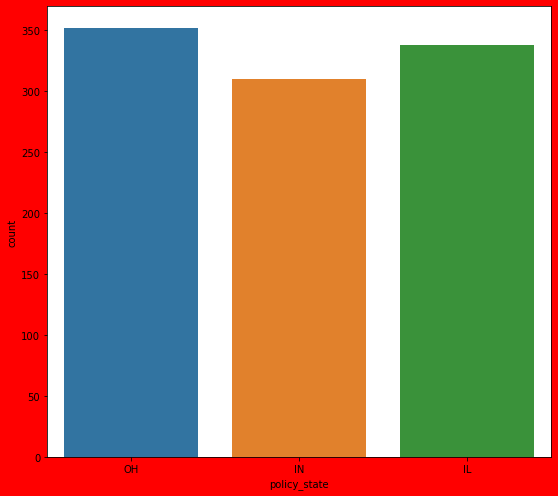

In [627]:
plt.figure(figsize = (15,7), facecolor = 'red')
plotnumber = 1

for column in data['policy_state']:
    if plotnumber <=1:
        ax = plt.subplot(1,2,plotnumber)
        sns.countplot(data['policy_state'])
    plotnumber += 1
plt.tight_layout()
print(data['policy_state'].value_counts())

In [628]:
data['policy_state'].unique()

array(['OH', 'IN', 'IL'], dtype=object)

In [629]:
ord_enc=OrdinalEncoder(categories=[['OH', 'IN', 'IL']])
df1=ord_enc.fit_transform(data[['policy_state']])
print(df1)
data['policy_state']=df1

[[0.]
 [1.]
 [0.]
 [2.]
 [2.]
 [0.]
 [1.]
 [2.]
 [2.]
 [2.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [2.]
 [2.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [0.]
 [2.]
 [2.]
 [1.]
 [1.]
 [2.]
 [1.]
 [2.]
 [0.]
 [2.]
 [2.]
 [1.]
 [0.]
 [1.]
 [2.]
 [0.]
 [2.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [2.]
 [0.]
 [1.]
 [2.]
 [2.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [2.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [2.]
 [1.]
 [1.]
 [0.]
 [2.]
 [2.]
 [2.]
 [1.]
 [0.]
 [2.]
 [2.]
 [1.]
 [2.]
 [2.]
 [1.]
 [2.]
 [0.]
 [2.]
 [1.]
 [2.]
 [2.]
 [0.]
 [0.]
 [2.]
 [0.]
 [1.]
 [2.]
 [1.]
 [0.]
 [1.]
 [2.]
 [1.]
 [0.]
 [1.]
 [2.]
 [0.]
 [2.]
 [0.]
 [2.]
 [2.]
 [2.]
 [0.]
 [2.]
 [1.]
 [2.]
 [1.]
 [0.]
 [2.]
 [1.]
 [1.]
 [0.]
 [2.]
 [0.]
 [1.]
 [2.]
 [2.]
 [2.]
 [2.]
 [0.]
 [2.]
 [1.]
 [1.]
 [2.]
 [0.]
 [2.]
 [0.]
 [2.]
 [0.]
 [0.]
 [2.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [2.]
 [1.]
 [0.

In [630]:
data['policy_state'].unique()

array([0., 1., 2.])

250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64


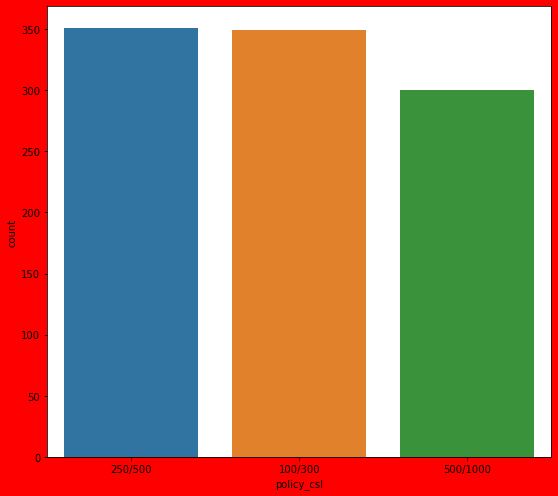

In [631]:
plt.figure(figsize = (15,7), facecolor = 'red')
plotnumber = 1

for column in data['policy_csl']:
    if plotnumber <=1:
        ax = plt.subplot(1,2,plotnumber)
        sns.countplot(data['policy_csl'])
    plotnumber += 1
plt.tight_layout()
print(data['policy_csl'].value_counts())

In [632]:
data['policy_csl'].unique()

array(['250/500', '100/300', '500/1000'], dtype=object)

In [633]:
ord_enc=OrdinalEncoder(categories=[['250/500', '100/300', '500/1000']])
df1=ord_enc.fit_transform(data[['policy_csl']])
print(df1)
data['policy_csl']=df1

[[0.]
 [0.]
 [1.]
 [0.]
 [2.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [2.]
 [1.]
 [0.]
 [1.]
 [2.]
 [2.]
 [2.]
 [2.]
 [0.]
 [2.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [2.]
 [0.]
 [1.]
 [2.]
 [1.]
 [2.]
 [1.]
 [1.]
 [2.]
 [2.]
 [0.]
 [1.]
 [0.]
 [2.]
 [0.]
 [1.]
 [0.]
 [1.]
 [2.]
 [2.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [2.]
 [0.]
 [0.]
 [1.]
 [2.]
 [2.]
 [2.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [2.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [2.]
 [0.]
 [2.]
 [2.]
 [0.]
 [2.]
 [0.]
 [0.]
 [2.]
 [1.]
 [2.]
 [2.]
 [2.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [2.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [2.]
 [1.]
 [2.]
 [2.]
 [2.]
 [2.]
 [0.]
 [1.]
 [2.]
 [1.]
 [0.]
 [1.]
 [2.]
 [2.]
 [0.]
 [0.]
 [2.]
 [2.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [2.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [2.]
 [0.]
 [0.]
 [1.]
 [0.]
 [2.]
 [0.]
 [1.]
 [2.]
 [0.]
 [0.]
 [2.]
 [1.]
 [2.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [2.]
 [2.]
 [2.]
 [2.]
 [0.]
 [2.]
 [0.

In [634]:
data['policy_csl'].unique()

array([0., 1., 2.])

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64


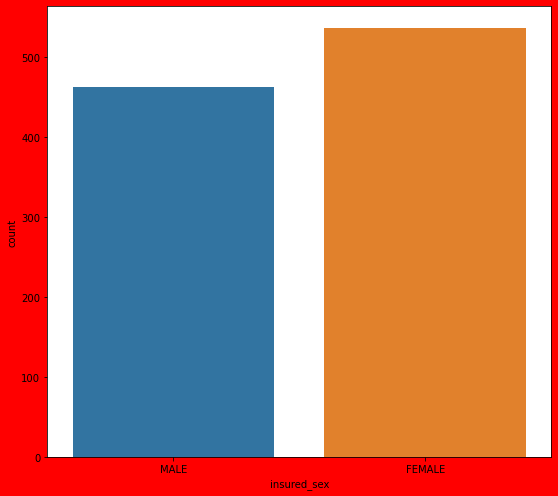

In [635]:
plt.figure(figsize = (15,7), facecolor = 'red')
plotnumber = 1

for column in data['insured_sex']:
    if plotnumber <=1:
        ax = plt.subplot(1,2,plotnumber)
        sns.countplot(data['insured_sex'])
    plotnumber += 1
plt.tight_layout()
print(data['insured_sex'].value_counts())

In [636]:
data['insured_sex'].unique()

array(['MALE', 'FEMALE'], dtype=object)

In [637]:
ord_enc=OrdinalEncoder(categories=[['MALE', 'FEMALE']])
df1=ord_enc.fit_transform(data[['insured_sex']])
print(df1)
data['insured_sex']=df1

[[0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.

In [638]:
data['insured_sex'].unique()

array([0., 1.])

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64


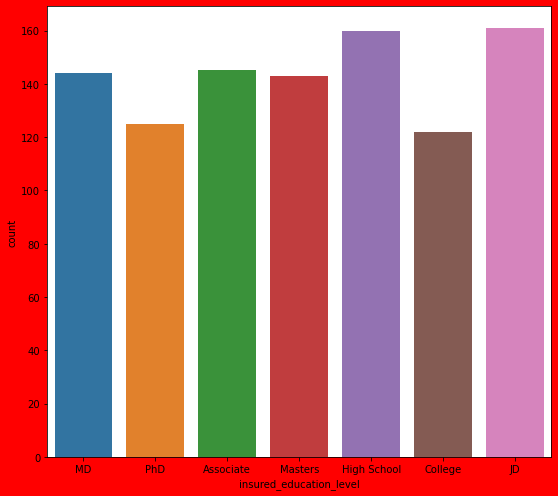

In [639]:
plt.figure(figsize = (15,7), facecolor = 'red')
plotnumber = 1

for column in data['insured_education_level']:
    if plotnumber <=1:
        ax = plt.subplot(1,2,plotnumber)
        sns.countplot(data['insured_education_level'])
    plotnumber += 1
plt.tight_layout()
print(data['insured_education_level'].value_counts())

In [640]:
data['insured_education_level'].unique()

array(['MD', 'PhD', 'Associate', 'Masters', 'High School', 'College',
       'JD'], dtype=object)

In [641]:
ord_enc=OrdinalEncoder(categories=[['MD', 'PhD', 'Associate', 'Masters', 'High School', 'College',
       'JD']])
df1=ord_enc.fit_transform(data[['insured_education_level']])
print(df1)
data['insured_education_level']=df1

[[0.]
 [0.]
 [1.]
 [1.]
 [2.]
 [1.]
 [1.]
 [2.]
 [1.]
 [1.]
 [3.]
 [4.]
 [0.]
 [0.]
 [5.]
 [0.]
 [5.]
 [4.]
 [0.]
 [4.]
 [6.]
 [2.]
 [4.]
 [0.]
 [5.]
 [3.]
 [4.]
 [6.]
 [6.]
 [1.]
 [3.]
 [6.]
 [2.]
 [4.]
 [1.]
 [4.]
 [3.]
 [6.]
 [0.]
 [6.]
 [2.]
 [2.]
 [5.]
 [1.]
 [6.]
 [0.]
 [2.]
 [5.]
 [1.]
 [3.]
 [0.]
 [6.]
 [5.]
 [6.]
 [1.]
 [1.]
 [1.]
 [3.]
 [1.]
 [0.]
 [1.]
 [6.]
 [4.]
 [6.]
 [1.]
 [0.]
 [4.]
 [2.]
 [0.]
 [0.]
 [2.]
 [0.]
 [2.]
 [5.]
 [2.]
 [4.]
 [5.]
 [5.]
 [6.]
 [1.]
 [4.]
 [3.]
 [3.]
 [4.]
 [3.]
 [4.]
 [2.]
 [0.]
 [5.]
 [5.]
 [4.]
 [2.]
 [1.]
 [0.]
 [4.]
 [1.]
 [2.]
 [3.]
 [5.]
 [5.]
 [5.]
 [5.]
 [6.]
 [2.]
 [5.]
 [5.]
 [2.]
 [4.]
 [1.]
 [3.]
 [5.]
 [1.]
 [4.]
 [0.]
 [2.]
 [0.]
 [1.]
 [4.]
 [1.]
 [2.]
 [4.]
 [0.]
 [3.]
 [5.]
 [6.]
 [6.]
 [0.]
 [4.]
 [5.]
 [3.]
 [6.]
 [3.]
 [3.]
 [4.]
 [1.]
 [5.]
 [4.]
 [1.]
 [4.]
 [0.]
 [3.]
 [3.]
 [1.]
 [0.]
 [6.]
 [2.]
 [3.]
 [0.]
 [1.]
 [6.]
 [1.]
 [3.]
 [4.]
 [3.]
 [3.]
 [2.]
 [6.]
 [6.]
 [3.]
 [6.]
 [2.]
 [0.]
 [0.]
 [3.]
 [3.]
 [1.]
 [2.

In [642]:
data['insured_education_level'].unique()

array([0., 1., 2., 3., 4., 5., 6.])

machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64


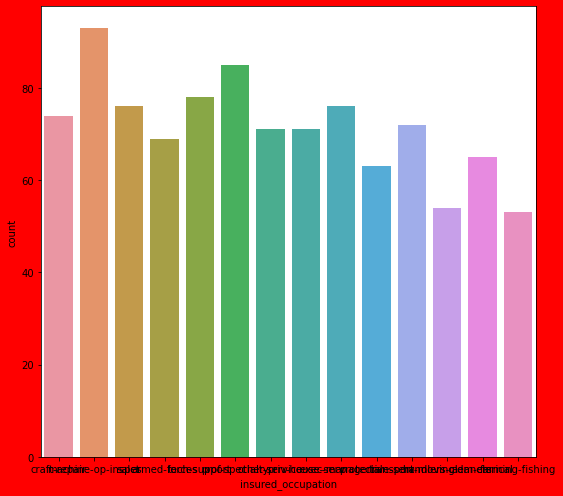

In [643]:
plt.figure(figsize = (15,7), facecolor = 'red')
plotnumber = 1

for column in data['insured_occupation']:
    if plotnumber <=1:
        ax = plt.subplot(1,2,plotnumber)
        sns.countplot(data['insured_occupation'])
    plotnumber += 1
plt.tight_layout()
print(data['insured_occupation'].value_counts())

In [644]:
data['insured_occupation'].unique()

array(['craft-repair', 'machine-op-inspct', 'sales', 'armed-forces',
       'tech-support', 'prof-specialty', 'other-service',
       'priv-house-serv', 'exec-managerial', 'protective-serv',
       'transport-moving', 'handlers-cleaners', 'adm-clerical',
       'farming-fishing'], dtype=object)

In [645]:
ord_enc=OrdinalEncoder(categories=[['craft-repair', 'machine-op-inspct', 'sales', 'armed-forces',
       'tech-support', 'prof-specialty', 'other-service',
       'priv-house-serv', 'exec-managerial', 'protective-serv',
       'transport-moving', 'handlers-cleaners', 'adm-clerical',
       'farming-fishing']])
df1=ord_enc.fit_transform(data[['insured_occupation']])
print(df1)
data['insured_occupation']=df1

[[ 0.]
 [ 1.]
 [ 2.]
 [ 3.]
 [ 2.]
 [ 4.]
 [ 5.]
 [ 4.]
 [ 6.]
 [ 7.]
 [ 8.]
 [ 8.]
 [ 9.]
 [ 3.]
 [ 1.]
 [10.]
 [ 1.]
 [ 1.]
 [ 0.]
 [11.]
 [ 6.]
 [ 1.]
 [ 5.]
 [ 7.]
 [ 0.]
 [ 2.]
 [ 5.]
 [ 8.]
 [ 2.]
 [ 1.]
 [ 5.]
 [ 0.]
 [12.]
 [13.]
 [ 5.]
 [ 0.]
 [ 9.]
 [ 7.]
 [ 0.]
 [ 4.]
 [ 4.]
 [10.]
 [ 5.]
 [10.]
 [ 7.]
 [ 9.]
 [ 6.]
 [ 6.]
 [ 9.]
 [ 8.]
 [ 6.]
 [13.]
 [ 3.]
 [ 7.]
 [ 1.]
 [ 0.]
 [ 5.]
 [12.]
 [ 6.]
 [12.]
 [ 1.]
 [11.]
 [ 3.]
 [10.]
 [ 2.]
 [ 8.]
 [ 4.]
 [12.]
 [ 1.]
 [ 6.]
 [ 5.]
 [ 3.]
 [ 2.]
 [10.]
 [ 2.]
 [10.]
 [11.]
 [10.]
 [ 6.]
 [11.]
 [ 8.]
 [ 8.]
 [ 6.]
 [ 8.]
 [ 5.]
 [10.]
 [ 7.]
 [ 6.]
 [ 5.]
 [ 8.]
 [ 2.]
 [ 4.]
 [13.]
 [ 8.]
 [ 1.]
 [ 3.]
 [ 9.]
 [13.]
 [ 1.]
 [ 8.]
 [ 9.]
 [ 4.]
 [ 5.]
 [ 4.]
 [ 6.]
 [ 5.]
 [ 5.]
 [11.]
 [ 1.]
 [ 2.]
 [ 5.]
 [ 0.]
 [ 8.]
 [ 9.]
 [ 3.]
 [ 1.]
 [ 1.]
 [ 8.]
 [10.]
 [12.]
 [ 7.]
 [ 6.]
 [ 6.]
 [ 5.]
 [ 5.]
 [ 0.]
 [ 9.]
 [ 4.]
 [13.]
 [ 2.]
 [ 1.]
 [12.]
 [ 4.]
 [ 1.]
 [ 8.]
 [ 8.]
 [ 2.]
 [ 4.]
 [ 5.]
 [ 6.]
 [ 1.]
 [10.]
 [ 1.]

In [646]:
data['insured_occupation'].unique()

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13.])

reading           64
exercise          57
paintball         57
bungie-jumping    56
movies            55
golf              55
camping           55
kayaking          54
yachting          53
hiking            52
video-games       50
skydiving         49
base-jumping      49
board-games       48
polo              47
chess             46
dancing           43
sleeping          41
cross-fit         35
basketball        34
Name: insured_hobbies, dtype: int64


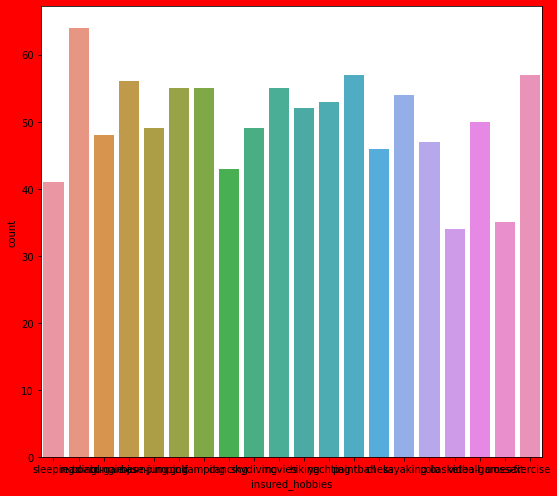

In [647]:
plt.figure(figsize = (15,7), facecolor = 'red')
plotnumber = 1

for column in data['insured_hobbies']:
    if plotnumber <=1:
        ax = plt.subplot(1,2,plotnumber)
        sns.countplot(data['insured_hobbies'])
    plotnumber += 1
plt.tight_layout()
print(data['insured_hobbies'].value_counts())

In [648]:
data['insured_hobbies'].unique()

array(['sleeping', 'reading', 'board-games', 'bungie-jumping',
       'base-jumping', 'golf', 'camping', 'dancing', 'skydiving',
       'movies', 'hiking', 'yachting', 'paintball', 'chess', 'kayaking',
       'polo', 'basketball', 'video-games', 'cross-fit', 'exercise'],
      dtype=object)

In [649]:
ord_enc=OrdinalEncoder(categories=[['sleeping', 'reading', 'board-games', 'bungie-jumping',
       'base-jumping', 'golf', 'camping', 'dancing', 'skydiving',
       'movies', 'hiking', 'yachting', 'paintball', 'chess', 'kayaking',
       'polo', 'basketball', 'video-games', 'cross-fit', 'exercise']])
df1=ord_enc.fit_transform(data[['insured_hobbies']])
print(df1)
data['insured_hobbies']=df1

[[ 0.]
 [ 1.]
 [ 2.]
 [ 2.]
 [ 2.]
 [ 3.]
 [ 2.]
 [ 4.]
 [ 5.]
 [ 6.]
 [ 7.]
 [ 8.]
 [ 1.]
 [ 3.]
 [ 2.]
 [ 9.]
 [10.]
 [ 1.]
 [11.]
 [ 6.]
 [ 3.]
 [ 8.]
 [12.]
 [13.]
 [14.]
 [15.]
 [ 5.]
 [13.]
 [14.]
 [16.]
 [17.]
 [ 1.]
 [11.]
 [17.]
 [11.]
 [ 1.]
 [ 6.]
 [ 5.]
 [ 3.]
 [17.]
 [14.]
 [13.]
 [10.]
 [ 1.]
 [ 1.]
 [11.]
 [15.]
 [14.]
 [ 7.]
 [ 9.]
 [ 3.]
 [15.]
 [16.]
 [ 9.]
 [ 9.]
 [ 8.]
 [13.]
 [10.]
 [11.]
 [14.]
 [ 4.]
 [16.]
 [ 3.]
 [17.]
 [13.]
 [13.]
 [12.]
 [ 1.]
 [ 9.]
 [14.]
 [ 0.]
 [18.]
 [12.]
 [ 5.]
 [11.]
 [ 3.]
 [ 5.]
 [ 7.]
 [14.]
 [15.]
 [12.]
 [17.]
 [ 3.]
 [17.]
 [ 9.]
 [ 2.]
 [11.]
 [11.]
 [14.]
 [19.]
 [ 2.]
 [19.]
 [11.]
 [19.]
 [10.]
 [19.]
 [10.]
 [ 8.]
 [14.]
 [ 1.]
 [11.]
 [19.]
 [ 3.]
 [14.]
 [16.]
 [14.]
 [16.]
 [ 6.]
 [16.]
 [13.]
 [17.]
 [ 7.]
 [15.]
 [ 6.]
 [ 1.]
 [10.]
 [ 3.]
 [19.]
 [11.]
 [ 6.]
 [ 2.]
 [17.]
 [ 8.]
 [ 9.]
 [12.]
 [ 7.]
 [17.]
 [19.]
 [16.]
 [ 0.]
 [ 6.]
 [12.]
 [19.]
 [ 8.]
 [16.]
 [11.]
 [19.]
 [ 5.]
 [16.]
 [10.]
 [ 6.]
 [17.]
 [17.]

In [650]:
data['insured_hobbies'].unique()

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19.])

own-child         183
other-relative    177
not-in-family     174
husband           170
wife              155
unmarried         141
Name: insured_relationship, dtype: int64


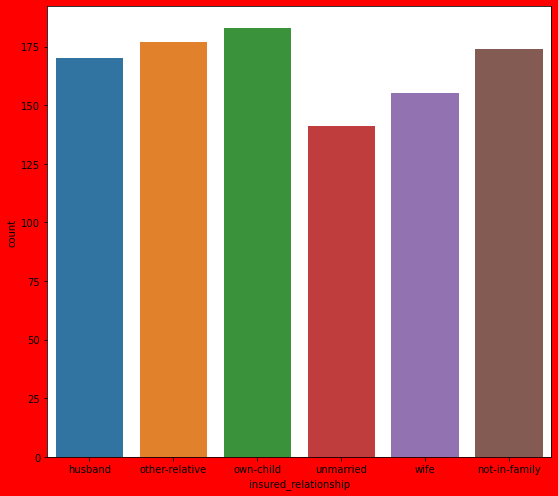

In [651]:
plt.figure(figsize = (15,7), facecolor = 'red')
plotnumber = 1

for column in data['insured_relationship']:
    if plotnumber <=1:
        ax = plt.subplot(1,2,plotnumber)
        sns.countplot(data['insured_relationship'])
    plotnumber += 1
plt.tight_layout()
print(data['insured_relationship'].value_counts())

In [652]:
data['insured_relationship'].unique()

array(['husband', 'other-relative', 'own-child', 'unmarried', 'wife',
       'not-in-family'], dtype=object)

In [653]:
ord_enc=OrdinalEncoder(categories=[['husband', 'other-relative', 'own-child', 'unmarried', 'wife',
       'not-in-family']])
df1=ord_enc.fit_transform(data[['insured_relationship']])
print(df1)
data['insured_relationship']=df1

[[0.]
 [1.]
 [2.]
 [3.]
 [3.]
 [3.]
 [0.]
 [3.]
 [2.]
 [4.]
 [1.]
 [1.]
 [4.]
 [4.]
 [5.]
 [1.]
 [2.]
 [3.]
 [1.]
 [2.]
 [2.]
 [2.]
 [1.]
 [2.]
 [0.]
 [2.]
 [2.]
 [5.]
 [5.]
 [3.]
 [0.]
 [0.]
 [1.]
 [4.]
 [2.]
 [5.]
 [3.]
 [3.]
 [3.]
 [4.]
 [5.]
 [3.]
 [0.]
 [2.]
 [3.]
 [0.]
 [0.]
 [0.]
 [1.]
 [4.]
 [2.]
 [0.]
 [5.]
 [0.]
 [5.]
 [5.]
 [3.]
 [2.]
 [0.]
 [2.]
 [1.]
 [0.]
 [3.]
 [2.]
 [5.]
 [1.]
 [5.]
 [3.]
 [2.]
 [2.]
 [2.]
 [5.]
 [0.]
 [5.]
 [4.]
 [1.]
 [0.]
 [5.]
 [4.]
 [3.]
 [0.]
 [4.]
 [1.]
 [4.]
 [5.]
 [2.]
 [0.]
 [2.]
 [5.]
 [5.]
 [2.]
 [2.]
 [2.]
 [5.]
 [5.]
 [0.]
 [5.]
 [2.]
 [4.]
 [5.]
 [5.]
 [3.]
 [0.]
 [1.]
 [4.]
 [0.]
 [0.]
 [2.]
 [1.]
 [0.]
 [3.]
 [3.]
 [1.]
 [2.]
 [1.]
 [1.]
 [1.]
 [3.]
 [5.]
 [0.]
 [1.]
 [1.]
 [5.]
 [1.]
 [5.]
 [3.]
 [3.]
 [2.]
 [4.]
 [0.]
 [4.]
 [2.]
 [3.]
 [4.]
 [3.]
 [1.]
 [1.]
 [5.]
 [4.]
 [5.]
 [1.]
 [4.]
 [2.]
 [1.]
 [4.]
 [4.]
 [5.]
 [1.]
 [5.]
 [5.]
 [4.]
 [0.]
 [2.]
 [2.]
 [2.]
 [1.]
 [0.]
 [1.]
 [5.]
 [1.]
 [3.]
 [5.]
 [3.]
 [5.]
 [3.]
 [5.]
 [3.

In [654]:
data['insured_relationship'].unique()

array([0., 1., 2., 3., 4., 5.])

Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64


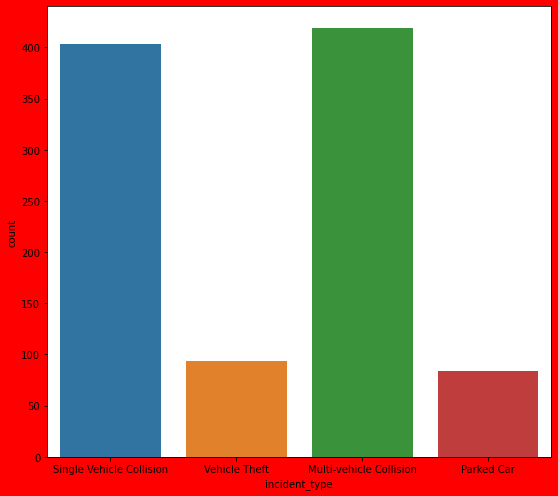

In [655]:
plt.figure(figsize = (15,7), facecolor = 'red')
plotnumber = 1

for column in data['incident_type']:
    if plotnumber <=1:
        ax = plt.subplot(1,2,plotnumber)
        sns.countplot(data['incident_type'])
    plotnumber += 1
plt.tight_layout()
print(data['incident_type'].value_counts())

In [656]:
data['incident_type'].unique()

array(['Single Vehicle Collision', 'Vehicle Theft',
       'Multi-vehicle Collision', 'Parked Car'], dtype=object)

In [657]:
ord_enc=OrdinalEncoder(categories=[['Single Vehicle Collision', 'Vehicle Theft',
       'Multi-vehicle Collision', 'Parked Car']])
df1=ord_enc.fit_transform(data[['incident_type']])
print(df1)
data['incident_type']=df1

[[0.]
 [1.]
 [2.]
 [0.]
 [1.]
 [2.]
 [2.]
 [2.]
 [0.]
 [0.]
 [0.]
 [2.]
 [0.]
 [3.]
 [0.]
 [2.]
 [2.]
 [0.]
 [0.]
 [2.]
 [2.]
 [2.]
 [2.]
 [0.]
 [0.]
 [2.]
 [3.]
 [1.]
 [0.]
 [0.]
 [2.]
 [2.]
 [2.]
 [2.]
 [0.]
 [0.]
 [0.]
 [3.]
 [2.]
 [0.]
 [0.]
 [0.]
 [2.]
 [0.]
 [0.]
 [2.]
 [2.]
 [2.]
 [1.]
 [0.]
 [2.]
 [1.]
 [1.]
 [2.]
 [3.]
 [0.]
 [2.]
 [3.]
 [0.]
 [2.]
 [2.]
 [2.]
 [0.]
 [2.]
 [2.]
 [2.]
 [0.]
 [2.]
 [0.]
 [3.]
 [2.]
 [0.]
 [0.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [1.]
 [0.]
 [2.]
 [1.]
 [1.]
 [1.]
 [2.]
 [2.]
 [2.]
 [0.]
 [3.]
 [2.]
 [2.]
 [0.]
 [3.]
 [2.]
 [2.]
 [1.]
 [0.]
 [2.]
 [3.]
 [1.]
 [0.]
 [0.]
 [2.]
 [3.]
 [2.]
 [1.]
 [2.]
 [2.]
 [0.]
 [2.]
 [0.]
 [0.]
 [2.]
 [2.]
 [1.]
 [2.]
 [0.]
 [2.]
 [0.]
 [2.]
 [0.]
 [0.]
 [0.]
 [2.]
 [0.]
 [2.]
 [0.]
 [3.]
 [0.]
 [2.]
 [2.]
 [2.]
 [2.]
 [0.]
 [0.]
 [0.]
 [1.]
 [2.]
 [2.]
 [2.]
 [0.]
 [1.]
 [3.]
 [0.]
 [2.]
 [0.]
 [2.]
 [0.]
 [0.]
 [0.]
 [0.]
 [2.]
 [2.]
 [2.]
 [2.]
 [0.]
 [2.]
 [3.]
 [2.]
 [1.]
 [3.]
 [0.]
 [2.]
 [0.]
 [2.]
 [2.]
 [0.

In [658]:
data['incident_type'].unique()

array([0., 1., 2., 3.])

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64


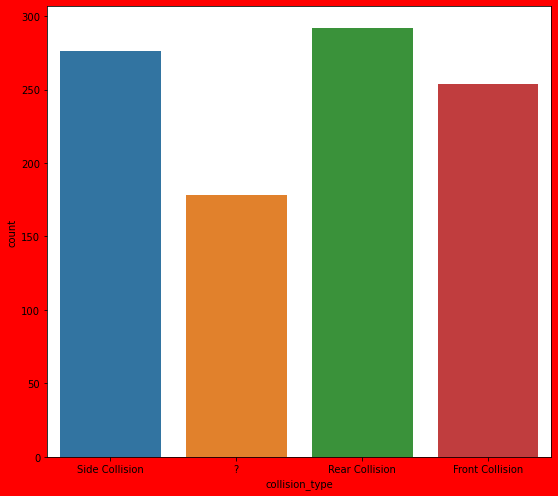

In [659]:
plt.figure(figsize = (15,7), facecolor = 'red')
plotnumber = 1

for column in data['collision_type']:
    if plotnumber <=1:
        ax = plt.subplot(1,2,plotnumber)
        sns.countplot(data['collision_type'])
    plotnumber += 1
plt.tight_layout()
print(data['collision_type'].value_counts())

we can see there are values with '?' lets convert 

In [660]:
data['collision_type'].unique()

array(['Side Collision', '?', 'Rear Collision', 'Front Collision'],
      dtype=object)

In [661]:
data.collision_type.replace('?',np.nan,inplace=True)

In [662]:
data['collision_type'] = data['collision_type'].fillna ('Rear Collision')

as rear collision has the higest value 

In [663]:
data['collision_type'].unique()

array(['Side Collision', 'Rear Collision', 'Front Collision'],
      dtype=object)

In [664]:
ord_enc=OrdinalEncoder(categories=[['Side Collision', 'Rear Collision', 'Front Collision']])
df1=ord_enc.fit_transform(data[['collision_type']])
print(df1)
data['collision_type']=df1

[[0.]
 [1.]
 [1.]
 [2.]
 [1.]
 [1.]
 [2.]
 [2.]
 [2.]
 [1.]
 [2.]
 [2.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [2.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [2.]
 [2.]
 [0.]
 [2.]
 [1.]
 [1.]
 [1.]
 [2.]
 [1.]
 [0.]
 [0.]
 [1.]
 [2.]
 [1.]
 [1.]
 [2.]
 [1.]
 [1.]
 [2.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [2.]
 [1.]
 [2.]
 [0.]
 [1.]
 [0.]
 [0.]
 [2.]
 [1.]
 [2.]
 [0.]
 [0.]
 [2.]
 [1.]
 [0.]
 [2.]
 [1.]
 [1.]
 [0.]
 [2.]
 [2.]
 [2.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [2.]
 [2.]
 [0.]
 [1.]
 [0.]
 [2.]
 [0.]
 [1.]
 [2.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [2.]
 [1.]
 [0.]
 [1.]
 [1.]
 [2.]
 [2.]
 [1.]
 [1.]
 [2.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [2.]
 [2.]
 [2.]
 [1.]
 [1.]
 [0.]
 [1.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [2.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [2.]
 [0.]
 [2.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [2.]
 [1.]
 [1.]
 [2.]
 [1.]
 [1.]
 [2.]
 [0.]
 [2.]
 [1.]
 [0.]
 [1.

In [665]:
data['collision_type'].unique()

array([0., 1., 2.])

Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64


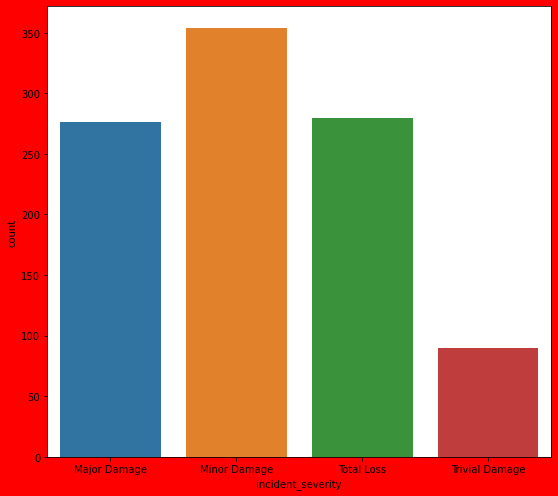

In [666]:
plt.figure(figsize = (15,7), facecolor = 'red')
plotnumber = 1

for column in data['incident_severity']:
    if plotnumber <=1:
        ax = plt.subplot(1,2,plotnumber)
        sns.countplot(data['incident_severity'])
    plotnumber += 1
plt.tight_layout()
print(data['incident_severity'].value_counts())

In [667]:
data['incident_severity'].unique()

array(['Major Damage', 'Minor Damage', 'Total Loss', 'Trivial Damage'],
      dtype=object)

In [668]:
ord_enc=OrdinalEncoder(categories=[['Major Damage', 'Minor Damage', 'Total Loss', 'Trivial Damage']])
df1=ord_enc.fit_transform(data[['incident_severity']])
print(df1)
data['incident_severity']=df1

[[0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [2.]
 [2.]
 [2.]
 [2.]
 [0.]
 [2.]
 [1.]
 [2.]
 [0.]
 [0.]
 [2.]
 [2.]
 [0.]
 [1.]
 [2.]
 [0.]
 [2.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [2.]
 [0.]
 [2.]
 [0.]
 [2.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [2.]
 [1.]
 [2.]
 [2.]
 [0.]
 [3.]
 [2.]
 [1.]
 [3.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [2.]
 [1.]
 [0.]
 [2.]
 [1.]
 [0.]
 [2.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [2.]
 [1.]
 [1.]
 [1.]
 [2.]
 [1.]
 [2.]
 [1.]
 [0.]
 [1.]
 [3.]
 [1.]
 [3.]
 [0.]
 [0.]
 [1.]
 [2.]
 [3.]
 [0.]
 [2.]
 [0.]
 [3.]
 [0.]
 [2.]
 [1.]
 [0.]
 [1.]
 [3.]
 [3.]
 [1.]
 [0.]
 [1.]
 [1.]
 [2.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [2.]
 [0.]
 [1.]
 [2.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [2.]
 [2.]
 [2.]
 [2.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [2.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [2.]
 [2.]
 [3.]
 [1.]
 [0.]
 [2.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [2.]
 [0.]
 [2.]
 [2.]
 [1.]
 [0.]
 [1.]
 [1.]
 [2.]
 [1.]
 [1.]
 [2.]
 [2.]
 [0.]
 [2.]
 [1.]
 [0.

In [669]:
data['incident_severity'].unique()

array([0., 1., 2., 3.])

Police       292
Fire         223
Other        198
Ambulance    196
None          91
Name: authorities_contacted, dtype: int64


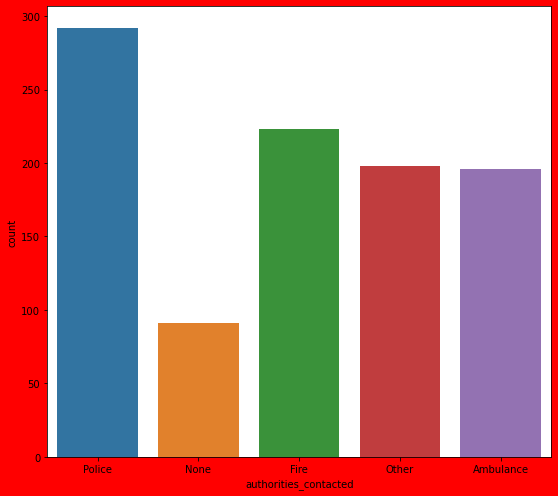

In [670]:
plt.figure(figsize = (15,7), facecolor = 'red')
plotnumber = 1

for column in data['authorities_contacted']:
    if plotnumber <=1:
        ax = plt.subplot(1,2,plotnumber)
        sns.countplot(data['authorities_contacted'])
    plotnumber += 1
plt.tight_layout()
print(data['authorities_contacted'].value_counts())

In [671]:
data['authorities_contacted'].unique()

array(['Police', 'None', 'Fire', 'Other', 'Ambulance'], dtype=object)

In [672]:
ord_enc=OrdinalEncoder(categories=[['Police', 'None', 'Fire', 'Other', 'Ambulance']])
df1=ord_enc.fit_transform(data[['authorities_contacted']])
print(df1)
data['authorities_contacted']=df1

[[0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [2.]
 [0.]
 [0.]
 [0.]
 [3.]
 [0.]
 [2.]
 [4.]
 [1.]
 [0.]
 [3.]
 [3.]
 [0.]
 [3.]
 [0.]
 [0.]
 [0.]
 [4.]
 [4.]
 [3.]
 [3.]
 [0.]
 [1.]
 [3.]
 [0.]
 [4.]
 [0.]
 [0.]
 [4.]
 [2.]
 [3.]
 [0.]
 [1.]
 [0.]
 [4.]
 [4.]
 [0.]
 [3.]
 [3.]
 [3.]
 [3.]
 [2.]
 [2.]
 [0.]
 [3.]
 [2.]
 [1.]
 [1.]
 [0.]
 [0.]
 [2.]
 [2.]
 [1.]
 [4.]
 [0.]
 [0.]
 [3.]
 [3.]
 [2.]
 [2.]
 [4.]
 [2.]
 [2.]
 [4.]
 [1.]
 [3.]
 [3.]
 [4.]
 [2.]
 [4.]
 [4.]
 [2.]
 [0.]
 [1.]
 [2.]
 [4.]
 [1.]
 [0.]
 [1.]
 [4.]
 [2.]
 [3.]
 [2.]
 [1.]
 [3.]
 [2.]
 [0.]
 [1.]
 [4.]
 [4.]
 [1.]
 [2.]
 [3.]
 [1.]
 [1.]
 [0.]
 [0.]
 [2.]
 [0.]
 [0.]
 [1.]
 [0.]
 [4.]
 [2.]
 [2.]
 [0.]
 [2.]
 [3.]
 [3.]
 [1.]
 [3.]
 [0.]
 [0.]
 [2.]
 [0.]
 [2.]
 [4.]
 [4.]
 [3.]
 [4.]
 [4.]
 [3.]
 [0.]
 [2.]
 [2.]
 [3.]
 [3.]
 [4.]
 [0.]
 [4.]
 [0.]
 [0.]
 [2.]
 [2.]
 [3.]
 [0.]
 [1.]
 [1.]
 [4.]
 [0.]
 [0.]
 [2.]
 [2.]
 [3.]
 [3.]
 [3.]
 [2.]
 [0.]
 [2.]
 [4.]
 [0.]
 [0.]
 [1.]
 [4.]
 [0.]
 [0.]
 [4.]
 [4.]
 [2.]
 [2.]
 [4.]
 [2.

In [673]:
data['authorities_contacted'].unique()

array([0., 1., 2., 3., 4.])

NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: incident_state, dtype: int64


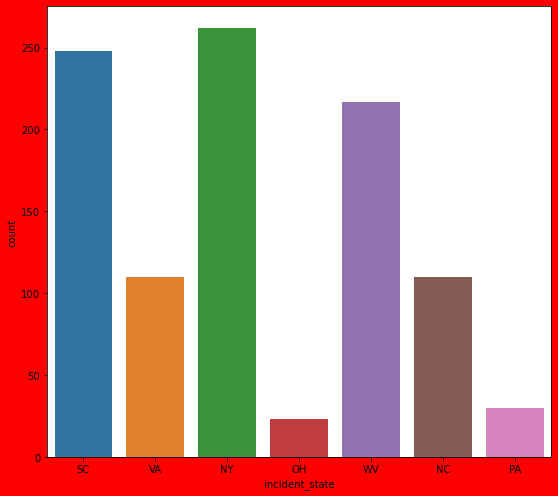

In [674]:
plt.figure(figsize = (15,7), facecolor = 'red')
plotnumber = 1

for column in data['incident_state']:
    if plotnumber <=1:
        ax = plt.subplot(1,2,plotnumber)
        sns.countplot(data['incident_state'])
    plotnumber += 1
plt.tight_layout()
print(data['incident_state'].value_counts())

In [675]:
data['incident_state'].unique()

array(['SC', 'VA', 'NY', 'OH', 'WV', 'NC', 'PA'], dtype=object)

In [676]:
ord_enc=OrdinalEncoder(categories=[['SC', 'VA', 'NY', 'OH', 'WV', 'NC', 'PA']])
df1=ord_enc.fit_transform(data[['incident_state']])
print(df1)
data['incident_state']=df1

[[0.]
 [1.]
 [2.]
 [3.]
 [2.]
 [0.]
 [2.]
 [1.]
 [4.]
 [5.]
 [2.]
 [0.]
 [0.]
 [0.]
 [0.]
 [4.]
 [2.]
 [4.]
 [2.]
 [1.]
 [2.]
 [0.]
 [0.]
 [4.]
 [1.]
 [3.]
 [6.]
 [1.]
 [0.]
 [0.]
 [0.]
 [4.]
 [2.]
 [2.]
 [4.]
 [4.]
 [2.]
 [4.]
 [2.]
 [5.]
 [4.]
 [4.]
 [0.]
 [5.]
 [0.]
 [2.]
 [5.]
 [4.]
 [2.]
 [4.]
 [2.]
 [2.]
 [4.]
 [5.]
 [1.]
 [2.]
 [0.]
 [1.]
 [4.]
 [1.]
 [2.]
 [3.]
 [4.]
 [4.]
 [1.]
 [2.]
 [0.]
 [4.]
 [4.]
 [5.]
 [0.]
 [4.]
 [5.]
 [0.]
 [1.]
 [0.]
 [2.]
 [4.]
 [0.]
 [0.]
 [5.]
 [5.]
 [2.]
 [1.]
 [2.]
 [2.]
 [0.]
 [1.]
 [4.]
 [0.]
 [0.]
 [2.]
 [4.]
 [5.]
 [0.]
 [3.]
 [1.]
 [0.]
 [4.]
 [5.]
 [0.]
 [4.]
 [5.]
 [4.]
 [0.]
 [4.]
 [1.]
 [4.]
 [2.]
 [2.]
 [0.]
 [5.]
 [4.]
 [1.]
 [1.]
 [2.]
 [0.]
 [2.]
 [2.]
 [2.]
 [0.]
 [2.]
 [1.]
 [5.]
 [4.]
 [2.]
 [4.]
 [6.]
 [2.]
 [0.]
 [2.]
 [4.]
 [5.]
 [4.]
 [4.]
 [2.]
 [1.]
 [0.]
 [5.]
 [1.]
 [2.]
 [0.]
 [0.]
 [0.]
 [4.]
 [5.]
 [5.]
 [4.]
 [0.]
 [0.]
 [2.]
 [5.]
 [2.]
 [4.]
 [5.]
 [2.]
 [2.]
 [4.]
 [4.]
 [2.]
 [1.]
 [0.]
 [2.]
 [0.]
 [6.]
 [4.]
 [4.

Springfield    157
Arlington      152
Columbus       149
Northbend      145
Hillsdale      141
Riverwood      134
Northbrook     122
Name: incident_city, dtype: int64


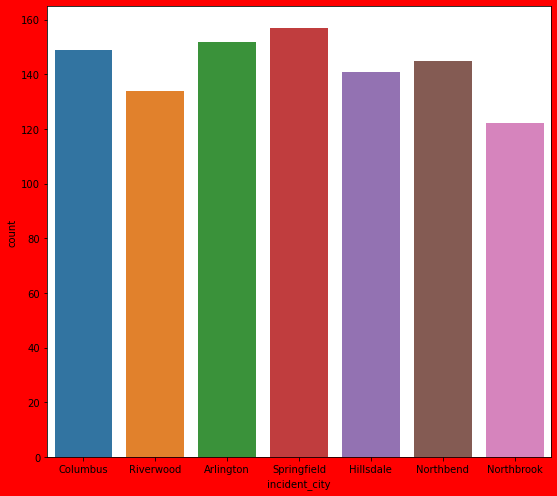

In [677]:
plt.figure(figsize = (15,7), facecolor = 'red')
plotnumber = 1

for column in data['incident_city']:
    if plotnumber <=1:
        ax = plt.subplot(1,2,plotnumber)
        sns.countplot(data['incident_city'])
    plotnumber += 1
plt.tight_layout()
print(data['incident_city'].value_counts())

In [678]:
data['incident_city'].unique()

array(['Columbus', 'Riverwood', 'Arlington', 'Springfield', 'Hillsdale',
       'Northbend', 'Northbrook'], dtype=object)

In [679]:
ord_enc=OrdinalEncoder(categories=[['Columbus', 'Riverwood', 'Arlington', 'Springfield', 'Hillsdale',
       'Northbend', 'Northbrook']])
df1=ord_enc.fit_transform(data[['incident_city']])
print(df1)
data['incident_city']=df1

[[0.]
 [1.]
 [0.]
 [2.]
 [2.]
 [2.]
 [3.]
 [0.]
 [2.]
 [4.]
 [5.]
 [3.]
 [5.]
 [3.]
 [3.]
 [4.]
 [1.]
 [5.]
 [6.]
 [0.]
 [0.]
 [2.]
 [4.]
 [5.]
 [1.]
 [2.]
 [2.]
 [6.]
 [5.]
 [6.]
 [0.]
 [1.]
 [2.]
 [4.]
 [4.]
 [3.]
 [6.]
 [2.]
 [4.]
 [0.]
 [0.]
 [6.]
 [3.]
 [2.]
 [3.]
 [2.]
 [5.]
 [2.]
 [2.]
 [3.]
 [1.]
 [2.]
 [5.]
 [0.]
 [5.]
 [2.]
 [0.]
 [1.]
 [1.]
 [4.]
 [3.]
 [3.]
 [4.]
 [5.]
 [1.]
 [2.]
 [3.]
 [4.]
 [6.]
 [1.]
 [4.]
 [6.]
 [2.]
 [1.]
 [3.]
 [1.]
 [3.]
 [6.]
 [3.]
 [6.]
 [2.]
 [6.]
 [6.]
 [4.]
 [4.]
 [6.]
 [0.]
 [3.]
 [2.]
 [0.]
 [2.]
 [0.]
 [3.]
 [1.]
 [5.]
 [6.]
 [3.]
 [4.]
 [0.]
 [6.]
 [5.]
 [5.]
 [6.]
 [5.]
 [5.]
 [0.]
 [5.]
 [0.]
 [6.]
 [3.]
 [1.]
 [3.]
 [0.]
 [4.]
 [6.]
 [1.]
 [4.]
 [5.]
 [4.]
 [2.]
 [4.]
 [6.]
 [0.]
 [2.]
 [5.]
 [4.]
 [0.]
 [6.]
 [5.]
 [5.]
 [2.]
 [0.]
 [2.]
 [5.]
 [5.]
 [3.]
 [1.]
 [3.]
 [3.]
 [3.]
 [5.]
 [6.]
 [5.]
 [3.]
 [3.]
 [6.]
 [5.]
 [6.]
 [3.]
 [3.]
 [0.]
 [4.]
 [1.]
 [0.]
 [6.]
 [1.]
 [0.]
 [5.]
 [3.]
 [0.]
 [3.]
 [6.]
 [4.]
 [2.]
 [0.]
 [0.]
 [1.

In [680]:
data['incident_city'].unique()

array([0., 1., 2., 3., 4., 5., 6.])

?      360
NO     338
YES    302
Name: property_damage, dtype: int64


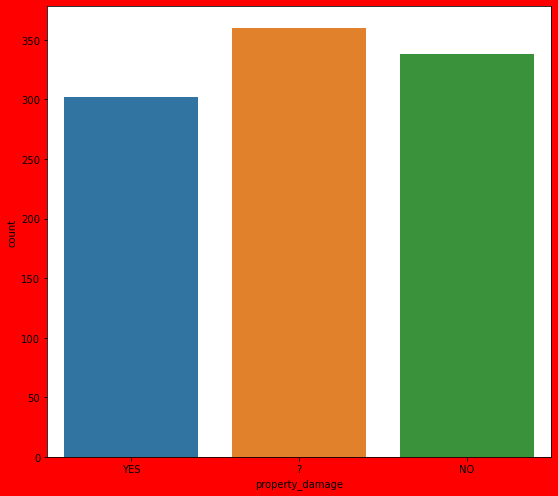

In [681]:
plt.figure(figsize = (15,7), facecolor = 'red')
plotnumber = 1

for column in data['property_damage']:
    if plotnumber <=1:
        ax = plt.subplot(1,2,plotnumber)
        sns.countplot(data['property_damage'])
    plotnumber += 1
plt.tight_layout()
print(data['property_damage'].value_counts())

In [682]:
data['property_damage'].unique()

array(['YES', '?', 'NO'], dtype=object)

we can see again there are ? values lets convert 

In [683]:
data.property_damage.replace('?',np.nan,inplace=True)

In [684]:
data['property_damage'] = data['property_damage'].fillna ('NO')

as NO has the higest value

In [685]:
data['property_damage'].unique()

array(['YES', 'NO'], dtype=object)

In [686]:
ord_enc=OrdinalEncoder(categories=[['YES', 'NO']])
df1=ord_enc.fit_transform(data[['property_damage']])
print(df1)
data['property_damage']=df1

[[0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.

?      343
NO     343
YES    314
Name: police_report_available, dtype: int64


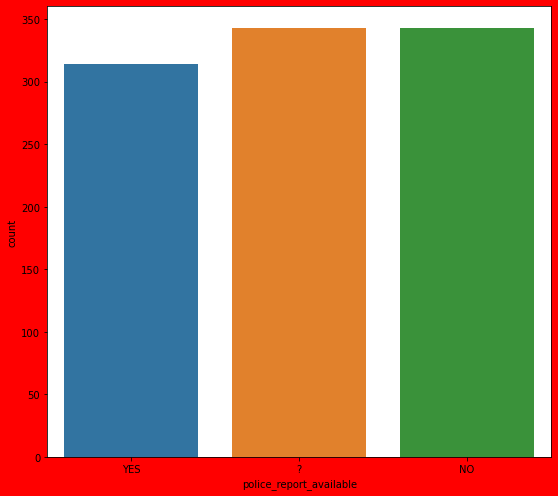

In [687]:
plt.figure(figsize = (15,7), facecolor = 'red')
plotnumber = 1

for column in data['police_report_available']:
    if plotnumber <=1:
        ax = plt.subplot(1,2,plotnumber)
        sns.countplot(data['police_report_available'])
    plotnumber += 1
plt.tight_layout()
print(data['police_report_available'].value_counts())

In [688]:
data['police_report_available'].unique()

array(['YES', '?', 'NO'], dtype=object)

we can see ? values once again lets convert

In [689]:
data.police_report_available.replace('?',np.nan,inplace=True)

In [690]:
data['police_report_available'] = data['police_report_available'].fillna ('NO')

as NO has the higest value

In [691]:
data['police_report_available'].unique()

array(['YES', 'NO'], dtype=object)

In [692]:
ord_enc=OrdinalEncoder(categories=[['YES', 'NO']])
df1=ord_enc.fit_transform(data[['police_report_available']])
print(df1)
data['police_report_available']=df1

[[0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.

Saab          80
Dodge         80
Suburu        80
Nissan        78
Chevrolet     76
Ford          72
BMW           72
Toyota        70
Audi          69
Accura        68
Volkswagen    68
Jeep          67
Mercedes      65
Honda         55
Name: auto_make, dtype: int64


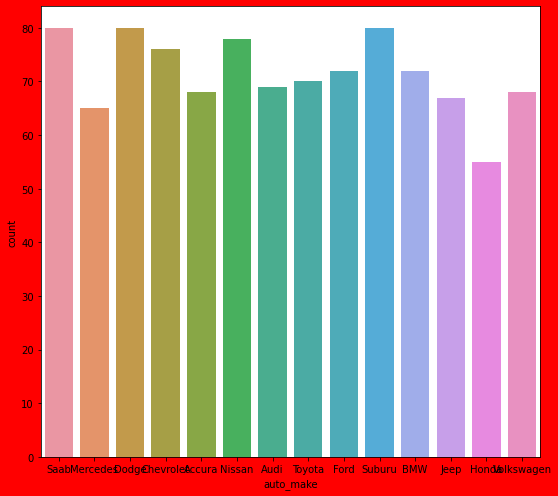

In [693]:
plt.figure(figsize = (15,7), facecolor = 'red')
plotnumber = 1

for column in data['auto_make']:
    if plotnumber <=1:
        ax = plt.subplot(1,2,plotnumber)
        sns.countplot(data['auto_make'])
    plotnumber += 1
plt.tight_layout()
print(data['auto_make'].value_counts())

In [694]:
data['auto_make'].unique()

array(['Saab', 'Mercedes', 'Dodge', 'Chevrolet', 'Accura', 'Nissan',
       'Audi', 'Toyota', 'Ford', 'Suburu', 'BMW', 'Jeep', 'Honda',
       'Volkswagen'], dtype=object)

In [695]:
ord_enc=OrdinalEncoder(categories=[['Saab', 'Mercedes', 'Dodge', 'Chevrolet', 'Accura', 'Nissan',
       'Audi', 'Toyota', 'Ford', 'Suburu', 'BMW', 'Jeep', 'Honda',
       'Volkswagen']])
df1=ord_enc.fit_transform(data[['auto_make']])
print(df1)
data['auto_make']=df1

[[ 0.]
 [ 1.]
 [ 2.]
 [ 3.]
 [ 4.]
 [ 0.]
 [ 5.]
 [ 6.]
 [ 7.]
 [ 0.]
 [ 8.]
 [ 6.]
 [ 0.]
 [ 7.]
 [ 2.]
 [ 4.]
 [ 5.]
 [ 9.]
 [ 4.]
 [ 5.]
 [ 9.]
 [ 4.]
 [ 9.]
 [ 2.]
 [ 8.]
 [ 8.]
 [ 7.]
 [ 9.]
 [ 2.]
 [ 4.]
 [ 7.]
 [ 8.]
 [10.]
 [ 9.]
 [ 6.]
 [ 1.]
 [ 9.]
 [ 9.]
 [11.]
 [ 5.]
 [10.]
 [10.]
 [ 2.]
 [ 1.]
 [ 7.]
 [ 4.]
 [12.]
 [ 6.]
 [13.]
 [ 1.]
 [ 5.]
 [10.]
 [ 7.]
 [ 9.]
 [ 8.]
 [ 3.]
 [12.]
 [ 3.]
 [ 0.]
 [ 8.]
 [ 5.]
 [12.]
 [10.]
 [ 9.]
 [ 8.]
 [ 2.]
 [ 6.]
 [10.]
 [ 6.]
 [ 8.]
 [ 6.]
 [12.]
 [ 3.]
 [ 1.]
 [10.]
 [ 8.]
 [ 9.]
 [ 6.]
 [ 0.]
 [10.]
 [ 4.]
 [ 4.]
 [ 5.]
 [13.]
 [ 6.]
 [ 9.]
 [ 8.]
 [10.]
 [ 2.]
 [ 4.]
 [ 0.]
 [12.]
 [10.]
 [ 8.]
 [ 1.]
 [ 7.]
 [ 2.]
 [ 5.]
 [ 0.]
 [ 6.]
 [ 0.]
 [ 0.]
 [ 8.]
 [ 7.]
 [ 3.]
 [ 1.]
 [ 0.]
 [13.]
 [ 0.]
 [ 5.]
 [ 2.]
 [ 8.]
 [10.]
 [ 0.]
 [ 8.]
 [ 4.]
 [ 9.]
 [ 7.]
 [ 8.]
 [10.]
 [13.]
 [ 8.]
 [ 5.]
 [ 4.]
 [10.]
 [ 8.]
 [ 9.]
 [10.]
 [10.]
 [ 0.]
 [ 8.]
 [ 2.]
 [ 5.]
 [11.]
 [10.]
 [13.]
 [ 8.]
 [10.]
 [ 7.]
 [10.]
 [ 1.]
 [ 9.]
 [ 3.]

RAM               43
Wrangler          42
A3                37
Neon              37
MDX               36
Jetta             35
Passat            33
A5                32
Legacy            32
Pathfinder        31
Malibu            30
92x               28
Camry             28
Forrestor         28
F150              27
95                27
E400              27
93                25
Grand Cherokee    25
Escape            24
Tahoe             24
Maxima            24
Ultima            23
X5                23
Highlander        22
Civic             22
Silverado         22
Fusion            21
ML350             20
Impreza           20
Corolla           20
TL                20
CRV               20
C300              18
3 Series          18
X6                16
M5                15
Accord            13
RSX               12
Name: auto_model, dtype: int64


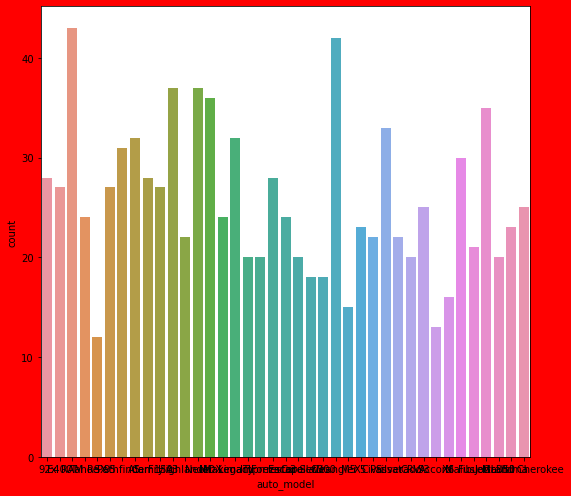

In [696]:
plt.figure(figsize = (15,7), facecolor = 'red')
plotnumber = 1

for column in data['auto_model']:
    if plotnumber <=1:
        ax = plt.subplot(1,2,plotnumber)
        sns.countplot(data['auto_model'])
    plotnumber += 1
plt.tight_layout()
print(data['auto_model'].value_counts())

we dont need auto_model as the car it belongs to is already in auto_make so we gonna drop this column 

In [697]:
data.drop(['auto_model'],axis = 1, inplace = True)

N    753
Y    247
Name: fraud_reported, dtype: int64


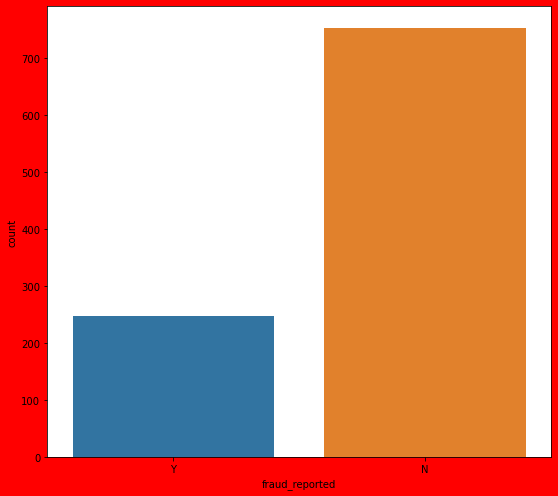

In [698]:
plt.figure(figsize = (15,7), facecolor = 'red')
plotnumber = 1

for column in data['fraud_reported']:
    if plotnumber <=1:
        ax = plt.subplot(1,2,plotnumber)
        sns.countplot(data['fraud_reported'])
    plotnumber += 1
plt.tight_layout()
print(data['fraud_reported'].value_counts())

In [699]:
data['fraud_reported'].unique()

array(['Y', 'N'], dtype=object)

In [700]:
ord_enc=OrdinalEncoder(categories=[['Y', 'N']])
df1=ord_enc.fit_transform(data[['fraud_reported']])
print(df1)
data['fraud_reported']=df1

[[0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.

In [701]:
data['policy_bind_date'].unique()

array(['17-10-2014', '27-06-2006', '06-09-2000', '25-05-1990',
       '06-06-2014', '12-10-2006', '04-06-2000', '03-02-1990',
       '05-02-1997', '25-07-2011', '26-05-2002', '29-05-1999',
       '20-11-1997', '26-10-2012', '28-12-1998', '19-10-1992',
       '08-06-2005', '15-11-2004', '28-12-2014', '02-08-1992',
       '25-06-2002', '27-11-2005', '27-05-1994', '08-02-1991',
       '02-02-1996', '05-12-2013', '20-09-1990', '18-07-2002',
       '08-02-1990', '04-03-2014', '18-02-2000', '19-06-2008',
       '01-08-2003', '04-04-1992', '13-01-1991', '08-08-2010',
       '09-03-2003', '03-02-1993', '25-11-2002', '27-07-1997',
       '08-05-1995', '30-08-2012', '30-04-2006', '13-04-2003',
       '05-12-2007', '21-08-2006', '08-01-1990', '18-03-1990',
       '07-01-2008', '10-03-1997', '10-01-2004', '20-08-1994',
       '02-06-2002', '28-04-1994', '17-08-2014', '11-08-2007',
       '20-11-2008', '18-10-1995', '19-05-1993', '26-02-2005',
       '14-02-1990', '30-09-1993', '10-06-2014', '28-10

In [702]:
data['incident_date'].unique()

array(['25-01-2015', '21-01-2015', '22-02-2015', '10-01-2015',
       '17-02-2015', '02-01-2015', '13-01-2015', '27-02-2015',
       '30-01-2015', '05-01-2015', '06-01-2015', '15-02-2015',
       '22-01-2015', '08-01-2015', '15-01-2015', '29-01-2015',
       '19-01-2015', '01-01-2015', '10-02-2015', '11-01-2015',
       '24-02-2015', '09-01-2015', '28-01-2015', '07-01-2015',
       '18-01-2015', '28-02-2015', '12-02-2015', '24-01-2015',
       '03-01-2015', '16-01-2015', '14-02-2015', '21-02-2015',
       '18-02-2015', '26-02-2015', '17-01-2015', '27-01-2015',
       '11-02-2015', '12-01-2015', '06-02-2015', '20-01-2015',
       '02-02-2015', '20-02-2015', '08-02-2015', '23-02-2015',
       '01-03-2015', '14-01-2015', '19-02-2015', '09-02-2015',
       '26-01-2015', '23-01-2015', '31-01-2015', '03-02-2015',
       '01-02-2015', '05-02-2015', '25-02-2015', '16-02-2015',
       '13-02-2015', '04-02-2015', '07-02-2015', '04-01-2015'],
      dtype=object)

In [703]:
#lets convert policy_bind_date column to date
data['policy_bind_date'] = pd.to_datetime(data['policy_bind_date'],format= '%d-%m-%Y')

In [704]:
#lets convert incident_date column to date
data['incident_date'] = pd.to_datetime(data['incident_date'],format= '%d-%m-%Y')

In [705]:
#Creating new column 
data['policybind_and_incident'] = data['incident_date'] - data['policy_bind_date']

In [706]:
data.policybind_and_incident.head(10)

0    100 days
1   3130 days
2   5282 days
3   8996 days
4    256 days
5   3004 days
6   5336 days
7   9155 days
8   6568 days
9   1260 days
Name: policybind_and_incident, dtype: timedelta64[ns]

In [707]:
#if we have to use these data then we have to extract numerical info from the above column 
for i in range(len(data.policybind_and_incident)):
    data['policybind_and_incident'][i] = data['policybind_and_incident'][i].days

In [708]:
data.policybind_and_incident.head(10)

0     100
1    3130
2    5282
3    8996
4     256
5    3004
6    5336
7    9155
8    6568
9    1260
Name: policybind_and_incident, dtype: object

now we can see data type is object lets change it to float 

In [709]:
data['policybind_and_incident'] = data['policybind_and_incident'].astype(float)

In [710]:
data.policybind_and_incident.head(10)

0     100.0
1    3130.0
2    5282.0
3    8996.0
4     256.0
5    3004.0
6    5336.0
7    9155.0
8    6568.0
9    1260.0
Name: policybind_and_incident, dtype: float64

lets drop columns which we used to create a new column 

In [711]:
data.drop(['policy_bind_date','incident_date'],axis = 1, inplace = True)

In [712]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_state                 1000 non-null   float64
 3   policy_csl                   1000 non-null   float64
 4   policy_deductable            1000 non-null   int64  
 5   policy_annual_premium        1000 non-null   float64
 6   insured_sex                  1000 non-null   float64
 7   insured_education_level      1000 non-null   float64
 8   insured_occupation           1000 non-null   float64
 9   insured_hobbies              1000 non-null   float64
 10  insured_relationship         1000 non-null   float64
 11  capital-gains                1000 non-null   int64  
 12  capital-loss                 1000 non-null   int64  
 13  incident_type      

now we can see all the values is in float or else int lets convert everthing into float

In [713]:
data['months_as_customer'] = data['months_as_customer'].astype(float)
data['age'] = data['age'].astype(float)
data['policy_deductable'] = data['policy_deductable'].astype(float)
data['capital-gains'] = data['capital-gains'].astype(float)
data['capital-loss'] = data['capital-loss'].astype(float)
data['incident_hour_of_the_day'] = data['incident_hour_of_the_day'].astype(float)
data['number_of_vehicles_involved'] = data['number_of_vehicles_involved'].astype(float)
data['bodily_injuries'] = data['bodily_injuries'].astype(float)
data['witnesses'] = data['witnesses'].astype(float)
data['total_claim_amount'] = data['total_claim_amount'].astype(float)
data['injury_claim'] = data['injury_claim'].astype(float)
data['property_claim'] = data['property_claim'].astype(float)
data['vehicle_claim'] = data['vehicle_claim'].astype(float)
data['auto_year'] = data['auto_year'].astype(float)


In [714]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   float64
 1   age                          1000 non-null   float64
 2   policy_state                 1000 non-null   float64
 3   policy_csl                   1000 non-null   float64
 4   policy_deductable            1000 non-null   float64
 5   policy_annual_premium        1000 non-null   float64
 6   insured_sex                  1000 non-null   float64
 7   insured_education_level      1000 non-null   float64
 8   insured_occupation           1000 non-null   float64
 9   insured_hobbies              1000 non-null   float64
 10  insured_relationship         1000 non-null   float64
 11  capital-gains                1000 non-null   float64
 12  capital-loss                 1000 non-null   float64
 13  incident_type      

In [715]:
data.describe()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_year,fraud_reported,policybind_and_incident
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,0.98600,0.949000,1136.000000,1256.406150,0.537000,3.060000,6.070000,9.270000,...,1.487000,0.686000,52761.94000,7433.420000,7399.570000,37928.950000,6.316000,2005.103000,0.753000,4739.140000
std,115.113174,9.140287,0.83096,0.805635,611.864673,244.167395,0.498879,2.009587,3.951546,5.702773,...,1.111335,0.464349,26401.53319,4880.951853,4824.726179,18886.252893,3.994008,6.015861,0.431483,2686.430702
min,0.000000,19.000000,0.00000,0.000000,500.000000,433.330000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,0.000000,1995.000000,0.000000,-20.000000
25%,115.750000,32.000000,0.00000,0.000000,500.000000,1089.607500,0.000000,1.000000,3.000000,4.000000,...,1.000000,0.000000,41812.50000,4295.000000,4445.000000,30292.500000,3.000000,2000.000000,1.000000,2484.000000
50%,199.500000,38.000000,1.00000,1.000000,1000.000000,1257.200000,1.000000,3.000000,6.000000,9.000000,...,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,6.000000,2005.000000,1.000000,4682.000000
75%,276.250000,44.000000,2.00000,2.000000,2000.000000,1415.695000,1.000000,5.000000,9.000000,14.000000,...,2.000000,1.000000,70592.50000,11305.000000,10885.000000,50822.500000,10.000000,2010.000000,1.000000,7068.000000
max,479.000000,64.000000,2.00000,2.000000,2000.000000,2047.590000,1.000000,6.000000,13.000000,19.000000,...,3.000000,1.000000,114920.00000,21450.000000,23670.000000,79560.000000,13.000000,2015.000000,1.000000,9172.000000


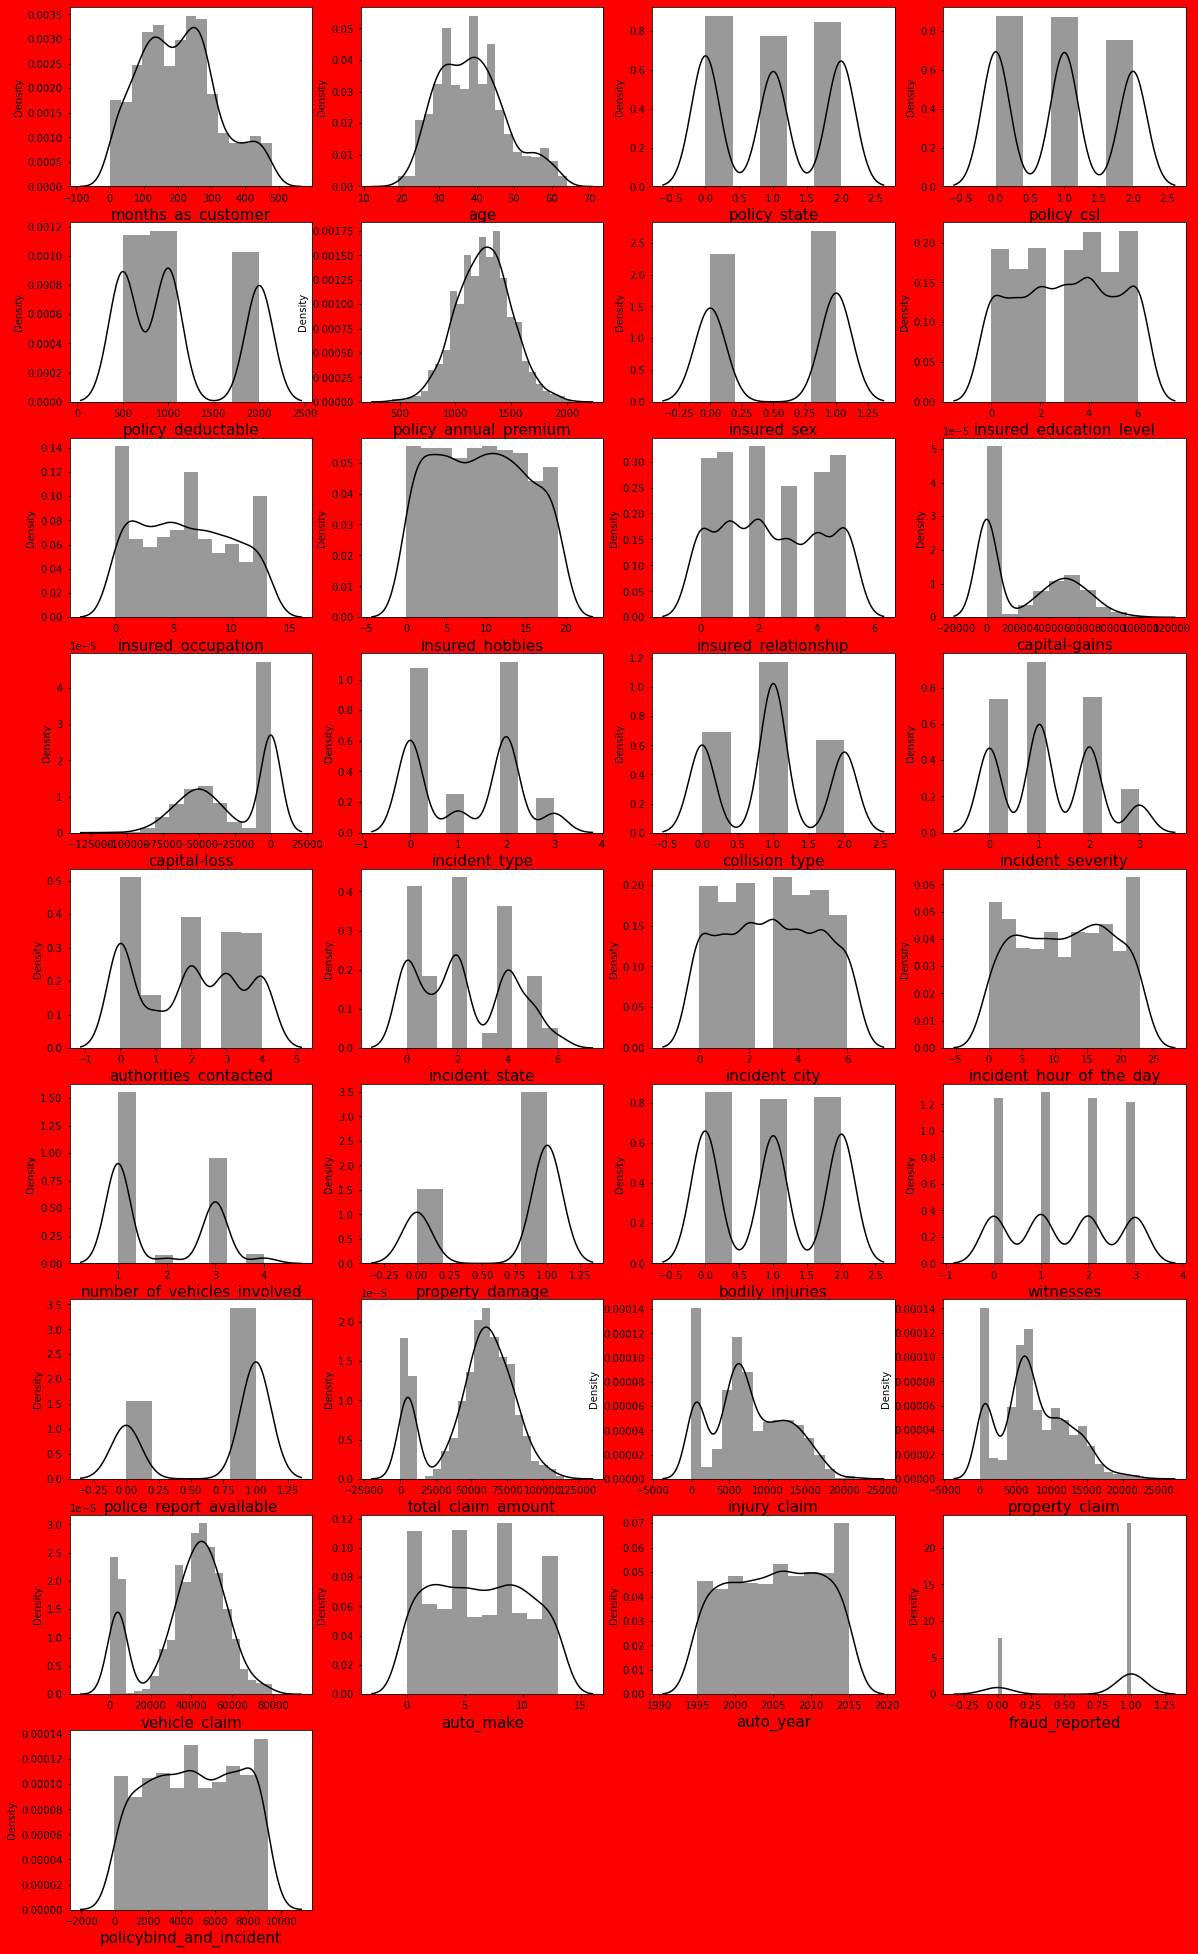

In [716]:
plt.figure(figsize = (20,35), facecolor = 'red')
plotnumber = 1

for column in data:
    if plotnumber <=33:
        ax = plt.subplot(9,4,plotnumber)
        sns.distplot(data[column], color = 'black')
        plt.xlabel(column,fontsize=15)
        
    plotnumber +=1
plt.show()

In [717]:
data.skew()

months_as_customer             0.362177
age                            0.478988
policy_state                   0.026177
policy_csl                     0.092720
policy_deductable              0.477887
policy_annual_premium          0.004402
insured_sex                   -0.148630
insured_education_level       -0.034161
insured_occupation             0.124125
insured_hobbies                0.067937
insured_relationship           0.073332
capital-gains                  0.478850
capital-loss                  -0.391472
incident_type                  0.051461
collision_type                 0.033682
incident_severity              0.279016
authorities_contacted         -0.027230
incident_state                 0.239731
incident_city                  0.020657
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
property_damage               -0.863806
bodily_injuries                0.014777
witnesses                      0.019636
police_report_available       -0.802728


we can ignore the output 

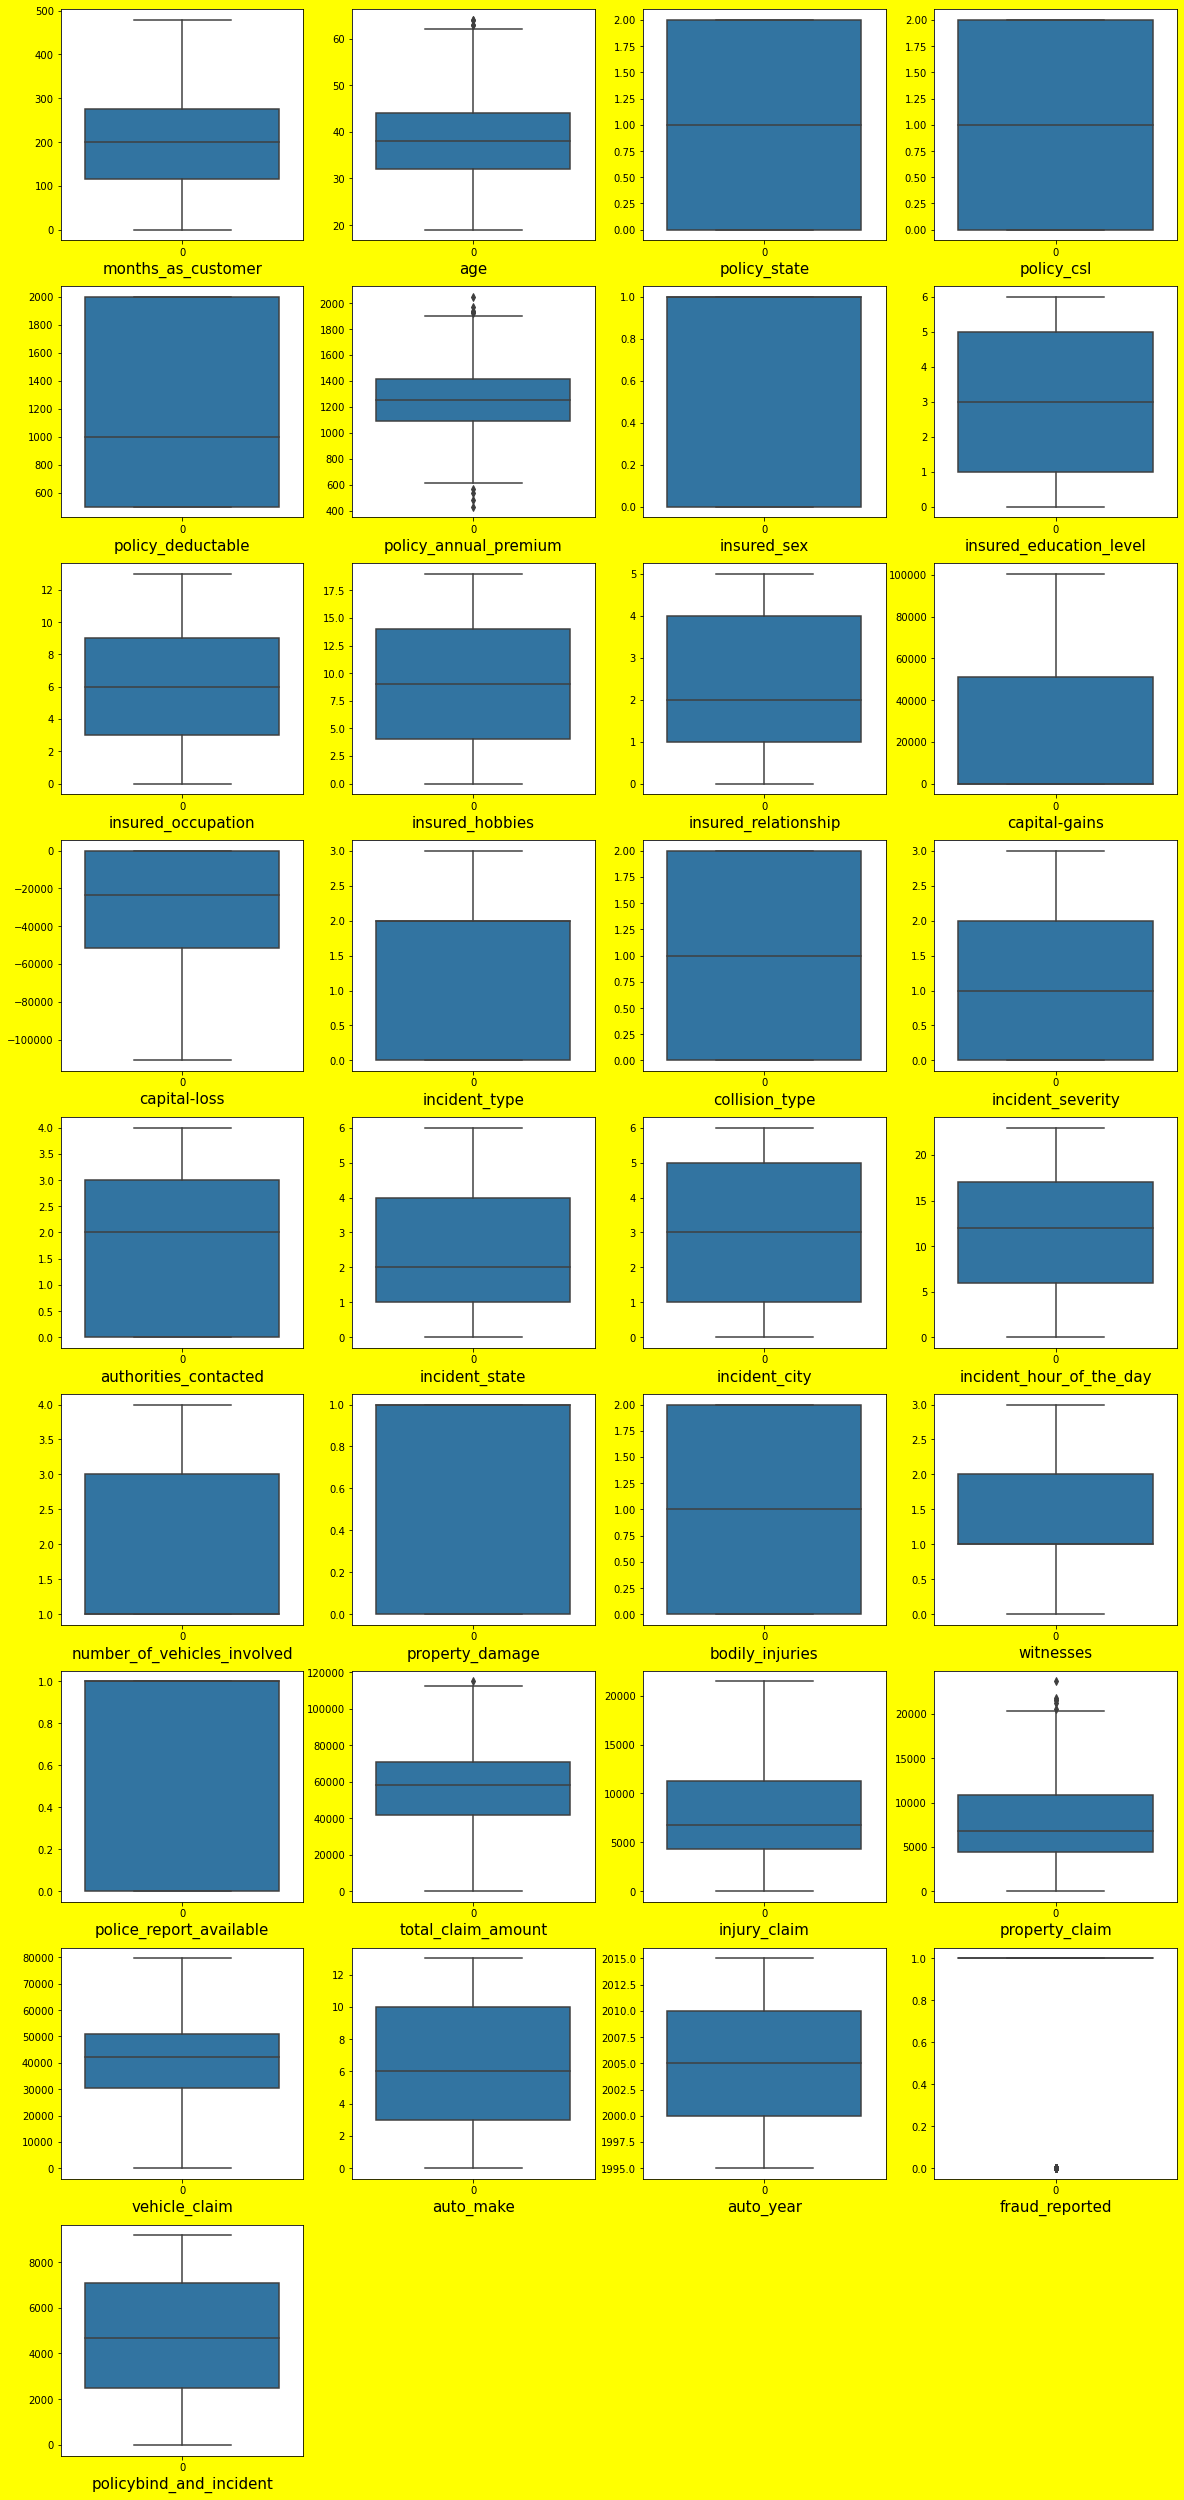

In [718]:
plt.figure(figsize=(20,45),facecolor='yellow')
graph=1
for column in data:
    if graph<=33:
        plt.subplot(9,4,graph)
        ax=sns.boxplot(data=data[column])
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show()

In [719]:
from scipy.stats import zscore
z_score= zscore(data[['age','policy_annual_premium','total_claim_amount','property_claim']])
abs_z_score=np.abs(z_score) #apply he formula and get the scaled data 

filtering_entry=(abs_z_score<3).all(axis=1)
data=data[filtering_entry]
data.describe()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_year,fraud_reported,policybind_and_incident
count,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,...,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000
mean,204.449799,38.980924,0.984940,0.948795,1137.550201,1257.616446,0.536145,3.058233,6.068273,9.271084,...,1.481928,0.686747,52735.100402,7427.680723,7385.702811,37921.716867,6.311245,2005.096386,0.753012,4746.058233
std,115.023399,9.140700,0.830798,0.804753,612.397564,240.385312,0.498942,2.008180,3.940941,5.710856,...,1.110333,0.464049,26373.980757,4879.556218,4799.806634,18874.919904,3.988112,6.015954,0.431476,2689.043650
min,0.000000,19.000000,0.000000,0.000000,500.000000,538.170000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,100.000000,0.000000,0.000000,70.000000,0.000000,1995.000000,0.000000,-20.000000
25%,116.000000,32.000000,0.000000,0.000000,500.000000,1090.567500,0.000000,1.000000,3.000000,4.000000,...,0.750000,0.000000,41812.500000,4295.000000,4445.000000,30292.500000,3.000000,2000.000000,1.000000,2484.000000
50%,200.000000,38.000000,1.000000,1.000000,1000.000000,1257.595000,1.000000,3.000000,6.000000,9.000000,...,1.000000,1.000000,57935.000000,6770.000000,6745.000000,42100.000000,6.000000,2005.000000,1.000000,4734.500000
75%,277.000000,44.250000,2.000000,2.000000,2000.000000,1415.695000,1.000000,5.000000,9.000000,14.000000,...,2.000000,1.000000,70530.000000,11285.000000,10865.000000,50762.500000,10.000000,2010.000000,1.000000,7071.500000
max,479.000000,64.000000,2.000000,2.000000,2000.000000,1969.630000,1.000000,6.000000,13.000000,19.000000,...,3.000000,1.000000,114920.000000,21450.000000,21810.000000,79560.000000,13.000000,2015.000000,1.000000,9172.000000


In [726]:
print('The data loss Percentage for removing outlier using the IQR is ', 100-((1000/996)*100))

The data loss Percentage for removing outlier using the IQR is  -0.40160642570282334


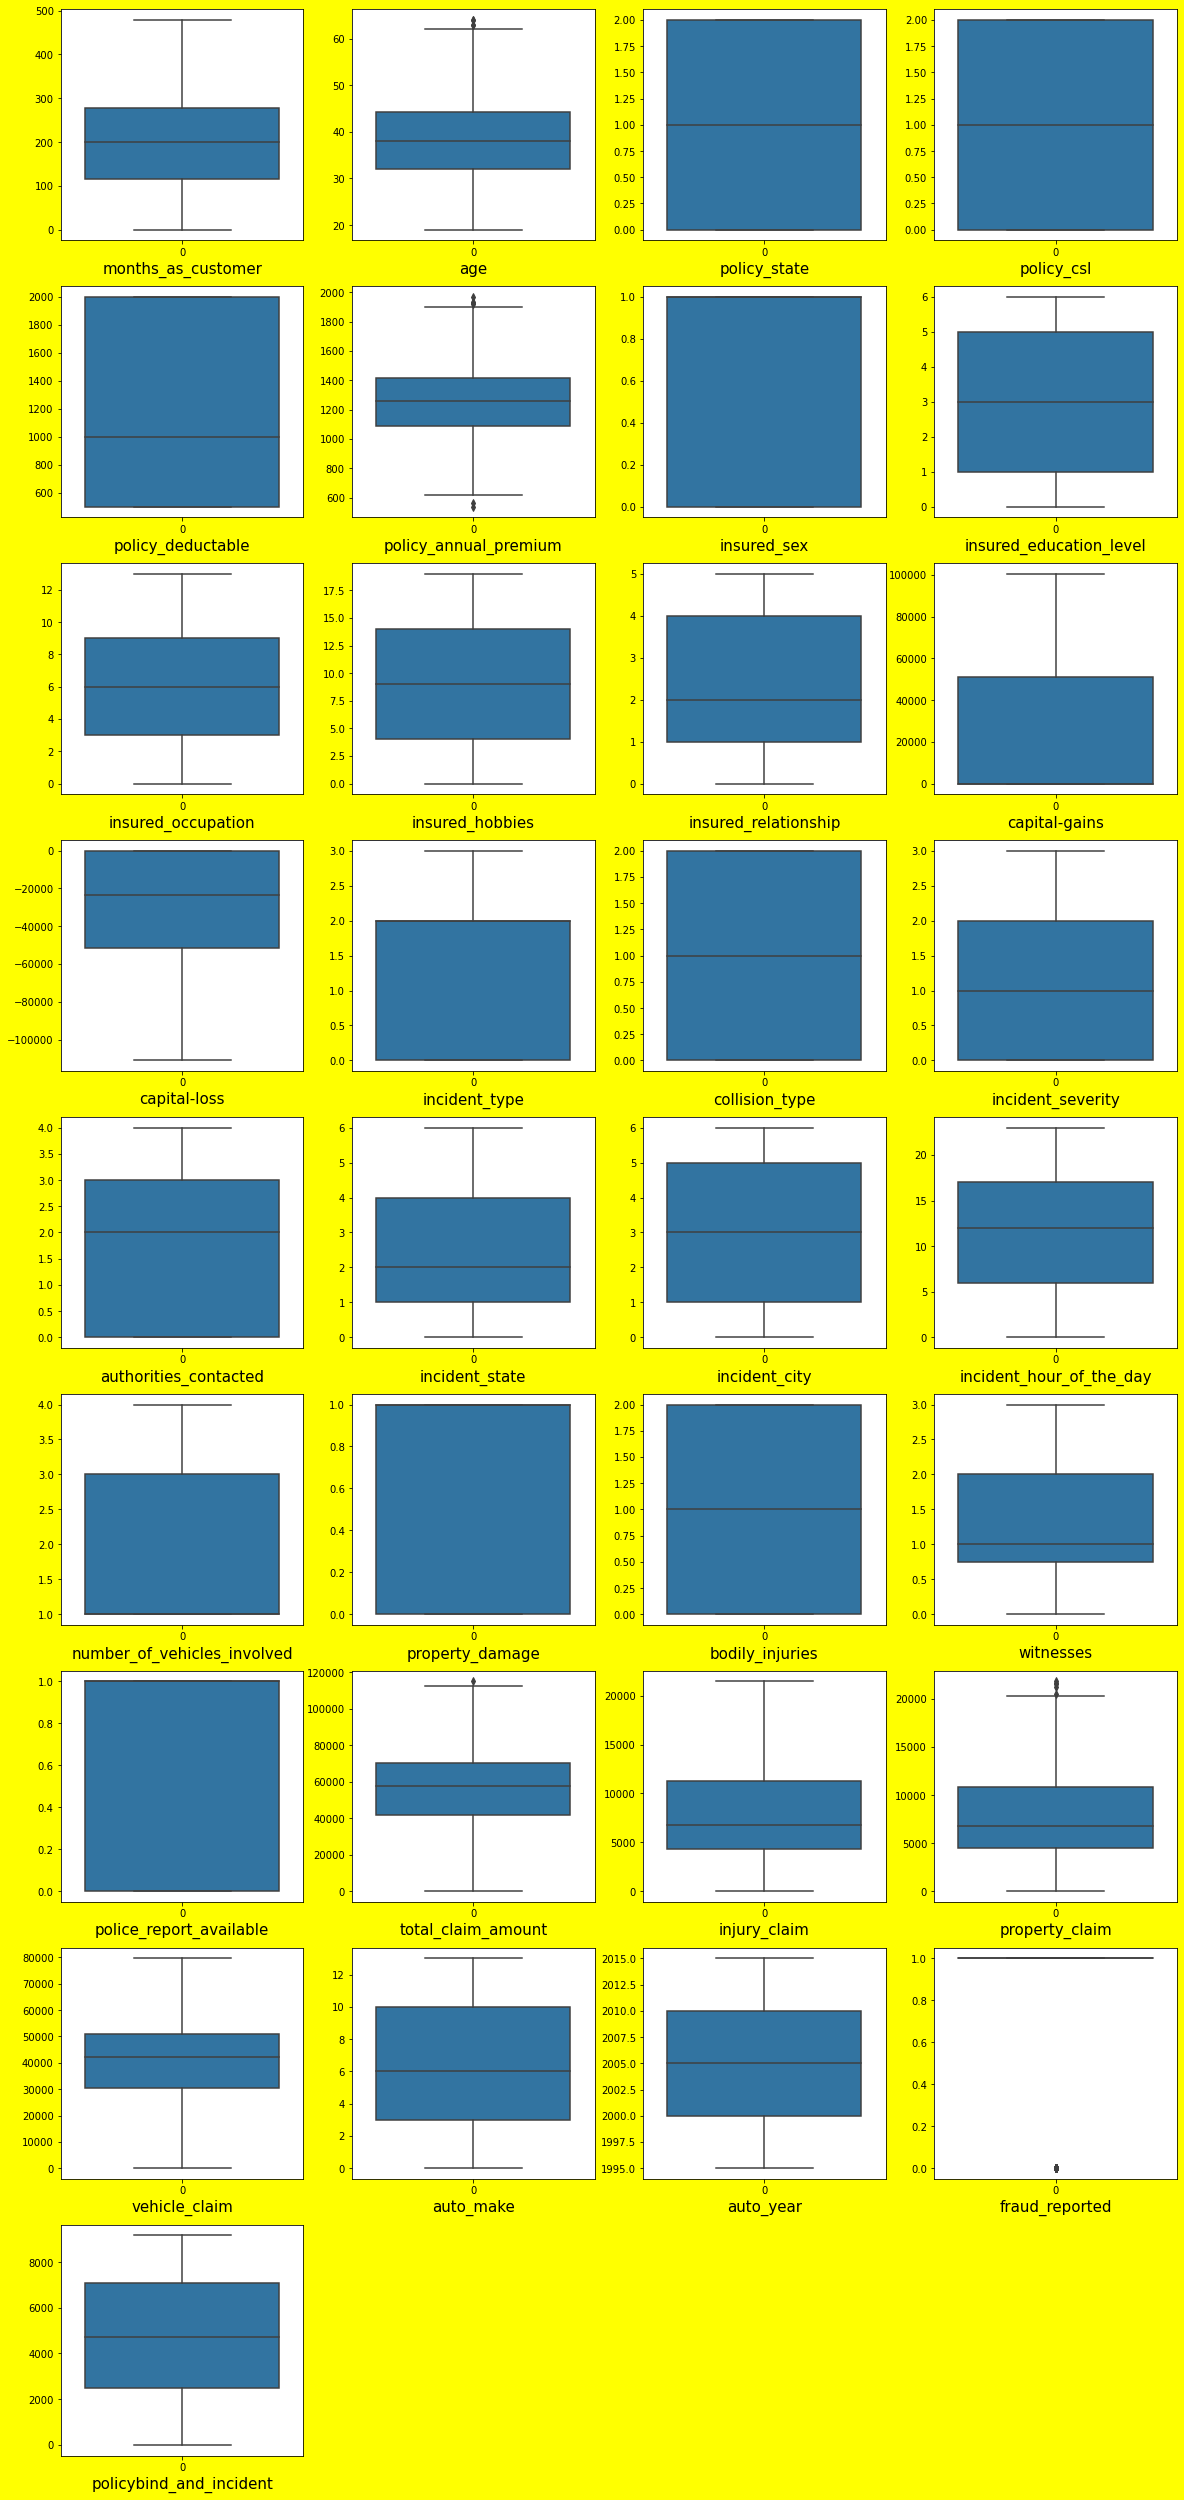

In [721]:
plt.figure(figsize=(20,45),facecolor='yellow')
graph=1
for column in data:
    if graph<=33:
        plt.subplot(9,4,graph)
        ax=sns.boxplot(data=data[column])
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show()

we can see most of the outliers have been removed 

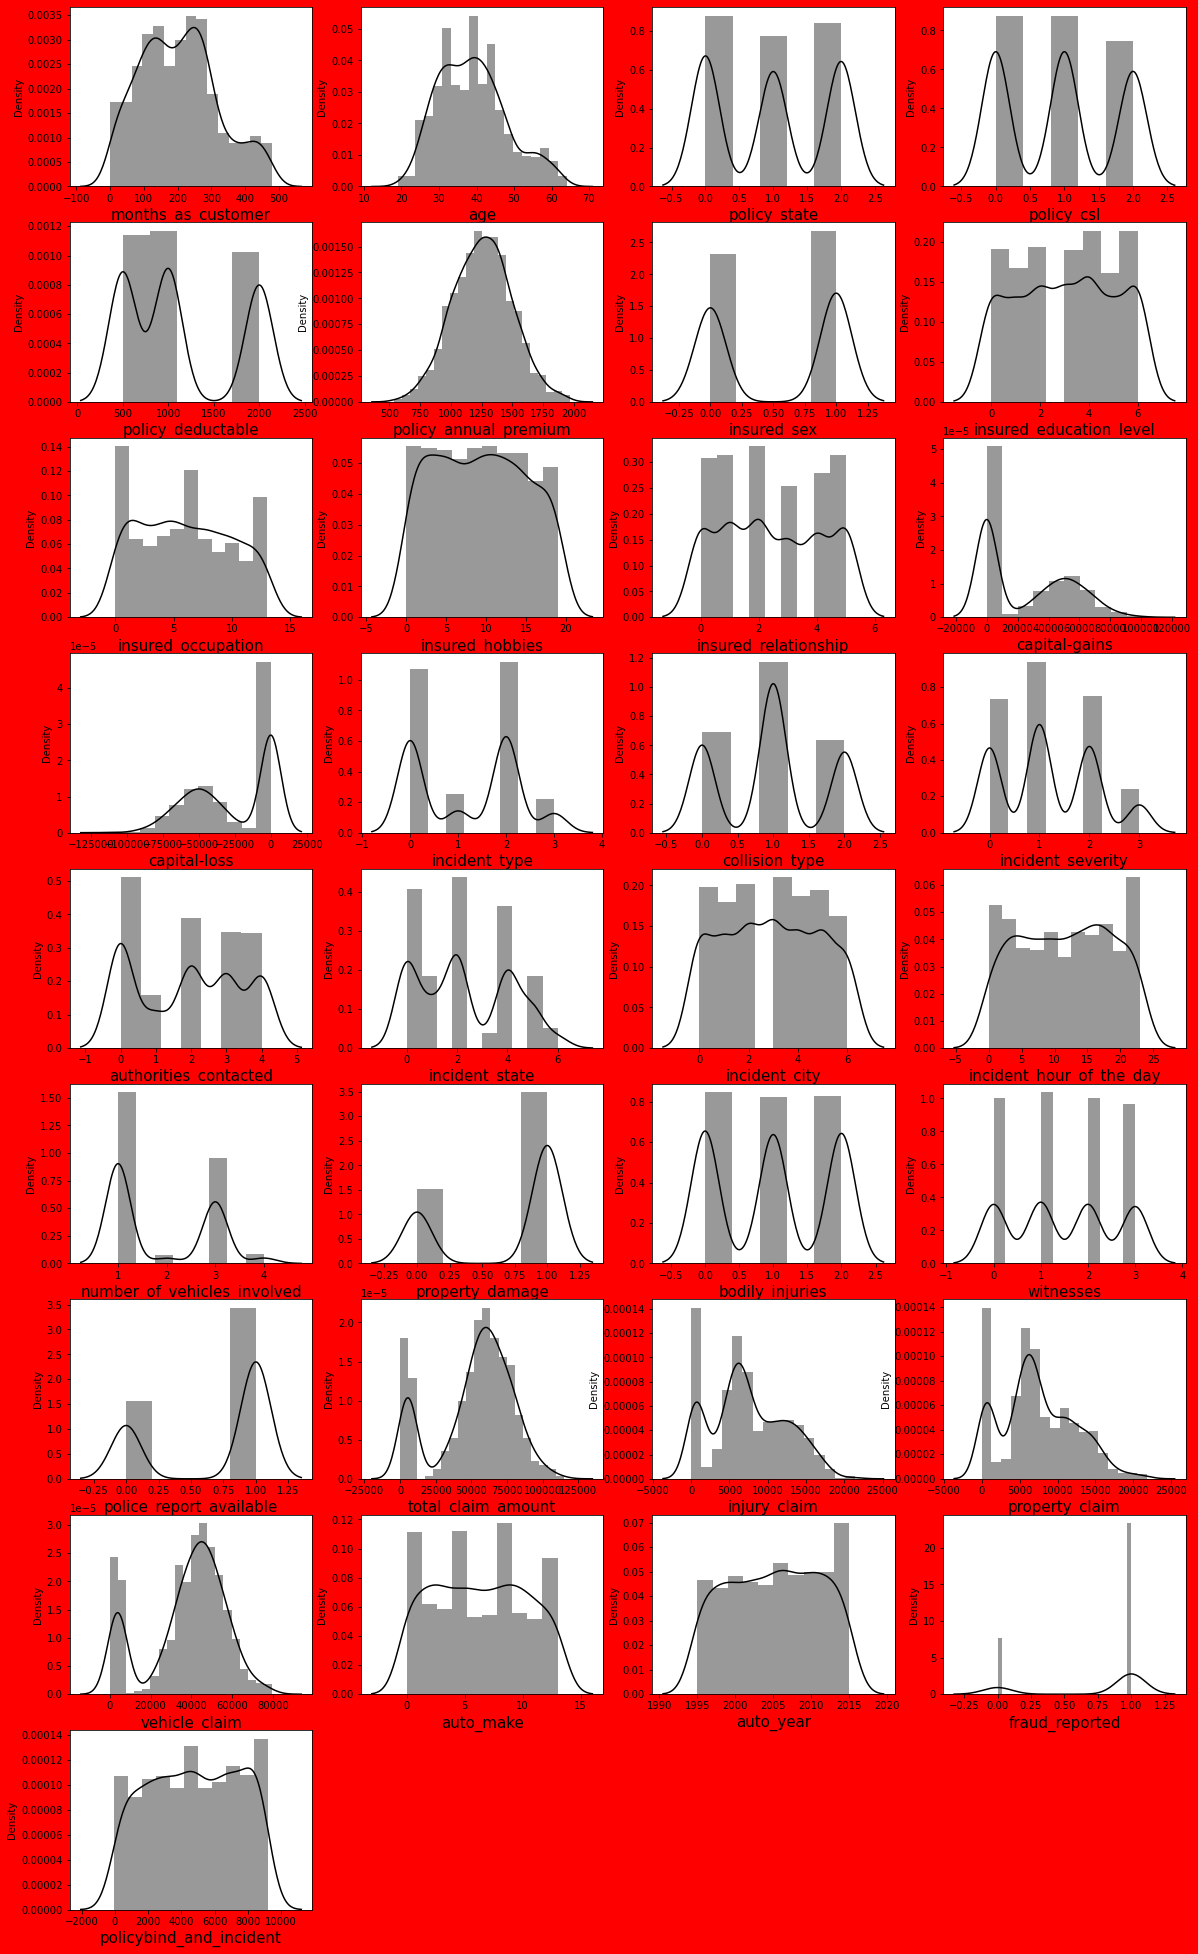

In [722]:
plt.figure(figsize = (20,35), facecolor = 'red')
plotnumber = 1

for column in data:
    if plotnumber <=33:
        ax = plt.subplot(9,4,plotnumber)
        sns.distplot(data[column], color = 'black')
        plt.xlabel(column,fontsize=15)
        
    plotnumber +=1
plt.show()

data looks better now 

In [723]:
scaler=StandardScaler()
X=data.drop('fraud_reported',axis=1)

In [724]:
x = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)

In [727]:
scaler=StandardScaler()
X=data.drop('fraud_reported',axis=1)
X_scaled=scaler.fit_transform(X)

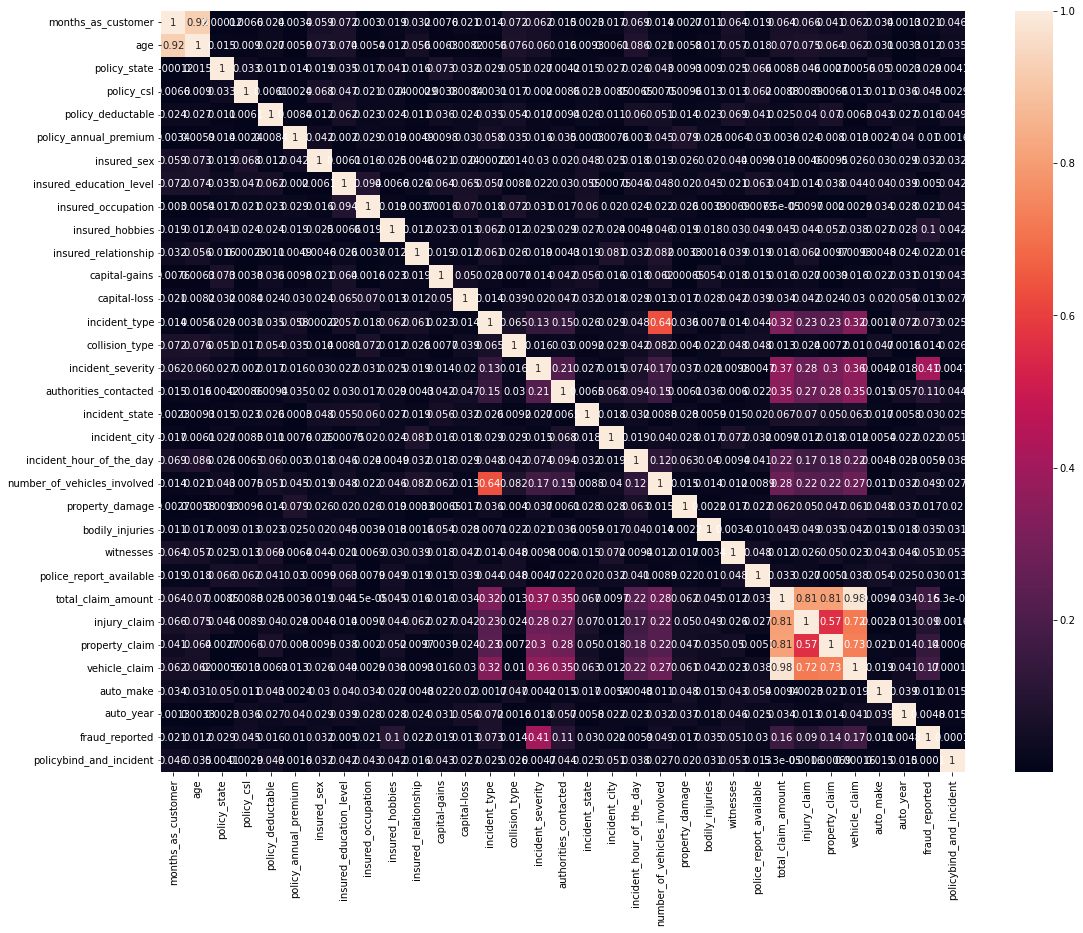

In [729]:
data_corr=data.corr().abs()
plt.figure(figsize=(18,14))
sns.heatmap(data_corr,annot=True, annot_kws={'size':10})
plt.show()

as there are more number of columns we gonna use PCA so we can handle multicolinearity also 

PCA

In [730]:
pca=PCA()
pca.fit_transform(X_scaled)

array([[ 1.31473991e+00,  1.37158273e+00, -9.64052753e-01, ...,
         8.67096026e-02,  2.55366337e-03,  4.32120740e-15],
       [-3.28877986e+00,  1.11752758e+00, -3.88968078e-01, ...,
        -3.25287420e-01,  8.45481525e-02,  7.45254806e-16],
       [-1.38869152e+00, -6.80329415e-01,  1.45133510e+00, ...,
        -6.45219626e-01, -2.83265491e-01,  4.03020523e-16],
       ...,
       [ 1.01374434e-01, -1.11196654e+00,  1.16219661e+00, ...,
         1.69728215e-01,  1.65771050e-01, -1.74065048e-16],
       [ 1.64231092e-01,  3.35756713e+00, -1.39051451e+00, ...,
        -1.35354765e-03,  2.15685240e-01, -7.92257537e-16],
       [-3.47094187e+00,  3.70477625e+00,  8.57407475e-01, ...,
         7.53162426e-01,  1.51974335e-01,  1.75922165e-15]])

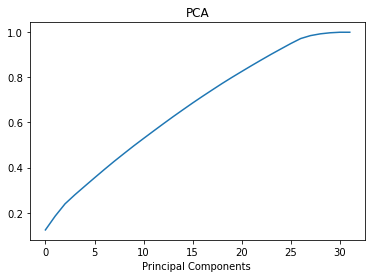

In [734]:
#lets plot scree plot to check the best components
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))#cumsum=cummulative summention
plt.xlabel('Principal Components ')
plt.title('PCA')
plt.show()
#explained_variance_ratio_ = how much data variance u can explain if ur using on component 
#cumsum = it will increase its value by adding one + another data then another and so on 

we can get upto 95% accuracy with 28 features

In [771]:
pca=PCA(n_components=28)
new_pcomp=pca.fit_transform(X_scaled)
princi_comp=pd.DataFrame(new_pcomp,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20','PC21','PC22','PC23','PC24','PC25','PC26','PC27','PC28'])
princi_comp

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28
0,1.314740,1.371583,-0.964053,-1.507046,2.053309,3.781558,-0.425985,0.823791,-0.339428,0.584654,...,1.087495,-0.166811,1.533611,-0.369953,-0.408352,-0.972596,0.830455,1.093660,-0.847616,-0.891659
1,-3.288780,1.117528,-0.388968,-1.767351,1.050149,0.519216,0.165730,1.128548,0.238880,-1.219690,...,0.119861,0.613958,1.104848,2.058184,0.299066,-0.396505,0.771100,1.255338,-0.669545,-0.018028
2,-1.388692,-0.680329,1.451335,-1.017270,2.368181,0.430853,-1.123544,0.898240,0.820198,0.381035,...,-1.450530,0.346304,0.058516,0.380304,0.049673,0.329685,0.407137,-0.295231,-0.874908,0.844940
3,0.330337,0.995881,-1.098829,0.331076,1.511568,-1.331308,-0.570723,1.003786,-0.272390,-0.427578,...,-1.290917,2.033621,0.275800,0.315572,-0.328349,-1.316199,-0.268946,-0.106281,-1.937276,-0.091502
4,-2.774388,1.066779,-0.165983,-0.595499,1.383109,1.073169,-0.228338,-0.722122,-0.409257,-0.479345,...,-0.279371,0.364921,-0.015878,0.914305,1.556609,-1.283427,0.080414,0.291312,-1.352229,-0.084323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,2.273196,-1.291865,-2.063361,-1.005446,-1.345225,-0.983052,-0.365495,0.748286,0.659597,-1.081217,...,0.277019,0.190905,-1.133080,-1.486990,1.152247,1.641050,0.253550,-1.426022,-0.390746,1.415700
992,4.486898,0.364020,-0.866035,0.496044,1.205951,0.684626,-1.311298,-1.311544,-1.057755,-0.450012,...,-0.404489,-1.022061,0.605338,-1.072705,0.352222,-0.639368,-1.502014,-0.405627,0.097786,0.007752
993,0.101374,-1.111967,1.162197,-1.010534,0.081581,1.434499,0.103268,1.155133,-1.136670,1.444296,...,0.382872,0.004619,0.833168,-1.354653,-0.676305,-0.448760,-0.310182,-1.242684,-0.975248,0.236274
994,0.164231,3.357567,-1.390515,-0.299262,-0.056736,-0.095973,0.760450,-0.292757,0.866008,0.045142,...,1.612909,0.381358,-0.466715,1.016870,-0.814775,-1.616046,1.546581,1.896559,0.299725,-0.174077


In [772]:
y=data['fraud_reported']

lets check the y value counts

In [774]:
y.value_counts()

1.0    750
0.0    246
Name: fraud_reported, dtype: int64

In [775]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
x_sm, y_sm = smote.fit_resample(princi_comp, y)

y_sm.value_counts()

0.0    750
1.0    750
Name: fraud_reported, dtype: int64

In [776]:
x_train,x_test,y_train,y_test=train_test_split(princi_comp,y,test_size=0.25,random_state=355)

In [777]:
def print_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=clf.predict(x_train)
        
        print('\n===============Train Reasult=============')
        print(f'Accuracy SCore :{accuracy_score(y_train,y_pred)*100:.2f}%')
    elif train==False:
        pred=clf.predict(x_test)
        
        print('\n===============Test Reasult=============')
        print(f'Accuracy SCore :{accuracy_score(y_test,pred)*100:.2f}%')
        print('\n\n Test Classification Report \n',classification_report(y_test,pred,digits=2))

In [778]:
from sklearn.svm import SVC
svc=SVC()
#svc model training and printing train and test score 
svc.fit(x_train,y_train)
#call the function and pass dataset to check train and test score 
print_score(svc,x_train,x_test,y_train,y_test,train=True)
print_score(svc,x_train,x_test,y_train,y_test,train=False)


===============Train Reasult=============
Accuracy SCore :87.15%

===============Test Reasult=============
Accuracy SCore :71.49%


 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.17      0.01      0.03        67
         1.0       0.73      0.97      0.83       182

    accuracy                           0.71       249
   macro avg       0.45      0.49      0.43       249
weighted avg       0.58      0.71      0.62       249



In [804]:
SVC_CVS=cross_val_score(svc,X_scaled,y,cv=5).mean()
SVC_CVS

0.7479849246231156

In [780]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
#lr model training and printing train and test score 
lr.fit(x_train,y_train)
#call the function and pass dataset to check train and test score 
print_score(lr,x_train,x_test,y_train,y_test,train=True)
print_score(lr,x_train,x_test,y_train,y_test,train=False)


===============Train Reasult=============
Accuracy SCore :79.92%

===============Test Reasult=============
Accuracy SCore :75.10%


 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.56      0.37      0.45        67
         1.0       0.79      0.89      0.84       182

    accuracy                           0.75       249
   macro avg       0.67      0.63      0.64       249
weighted avg       0.73      0.75      0.73       249



In [803]:
lr_CSV=cross_val_score(lr,X_scaled,y,cv=5).mean()
lr_CSV

0.7811206030150754

In [782]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()
#DTC model training and printing train and test score 
DTC.fit(x_train,y_train)
#call the function and pass dataset to check train and test score 
print_score(DTC,x_train,x_test,y_train,y_test,train=True)
print_score(DTC,x_train,x_test,y_train,y_test,train=False)


===============Train Reasult=============
Accuracy SCore :100.00%

===============Test Reasult=============
Accuracy SCore :65.86%


 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.34      0.30      0.32        67
         1.0       0.75      0.79      0.77       182

    accuracy                           0.66       249
   macro avg       0.55      0.54      0.55       249
weighted avg       0.64      0.66      0.65       249



In [802]:
DTC_csv=cross_val_score(DTC,X_scaled,y,cv=5).mean()
DTC_csv

0.7931859296482412

In [784]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
#knn model training and printing train and test score 
knn.fit(x_train,y_train)
#call the function and pass dataset to check train and test score 
print_score(knn,x_train,x_test,y_train,y_test,train=True)
print_score(knn,x_train,x_test,y_train,y_test,train=False)


===============Train Reasult=============
Accuracy SCore :80.46%

===============Test Reasult=============
Accuracy SCore :71.49%


 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.43      0.18      0.25        67
         1.0       0.75      0.91      0.82       182

    accuracy                           0.71       249
   macro avg       0.59      0.55      0.54       249
weighted avg       0.66      0.71      0.67       249



In [801]:
knn_csv=cross_val_score(knn,X_scaled,y,cv=5).mean()
knn_csv

0.7289045226130653

In [786]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
#rfc model training and printing train and test score 
rfc.fit(x_train,y_train)
#call the function and pass dataset to check train and test score 
print_score(rfc,x_train,x_test,y_train,y_test,train=True)
print_score(rfc,x_train,x_test,y_train,y_test,train=False)


===============Train Reasult=============
Accuracy SCore :100.00%

===============Test Reasult=============
Accuracy SCore :73.09%


 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.50      0.03      0.06        67
         1.0       0.73      0.99      0.84       182

    accuracy                           0.73       249
   macro avg       0.62      0.51      0.45       249
weighted avg       0.67      0.73      0.63       249



In [800]:
rfc_csv=cross_val_score(rfc,X_scaled,y,cv=5).mean()
rfc_csv

0.7530050251256281

In [788]:
from sklearn.ensemble import GradientBoostingClassifier
gbdt = GradientBoostingClassifier() 
gbdt.fit(x_train,y_train) 
print_score(gbdt,x_train,x_test,y_train,y_test,train=True)
print_score(gbdt,x_train,x_test,y_train,y_test,train=False)


===============Train Reasult=============
Accuracy SCore :96.25%

===============Test Reasult=============
Accuracy SCore :71.08%


 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.41      0.18      0.25        67
         1.0       0.75      0.91      0.82       182

    accuracy                           0.71       249
   macro avg       0.58      0.54      0.54       249
weighted avg       0.66      0.71      0.67       249



In [799]:
gbdt_csv=cross_val_score(gbdt,X_scaled,y,cv=5).mean()
gbdt_csv

0.8032211055276383

In [793]:
ada = AdaBoostClassifier() 
ada.fit(x_train,y_train) 
print_score(ada,x_train,x_test,y_train,y_test,train=True)
print_score(ada,x_train,x_test,y_train,y_test,train=False)


===============Train Reasult=============
Accuracy SCore :87.15%

===============Test Reasult=============
Accuracy SCore :72.69%


 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.49      0.37      0.42        67
         1.0       0.79      0.86      0.82       182

    accuracy                           0.73       249
   macro avg       0.64      0.62      0.62       249
weighted avg       0.71      0.73      0.71       249



In [794]:
ada_csv=cross_val_score(ada,X_scaled,y,cv=10).mean()
ada_csv

0.7792121212121212

In [795]:
bgg = BaggingClassifier() 
bgg.fit(x_train,y_train) 
print_score(bgg,x_train,x_test,y_train,y_test,train=True)
print_score(bgg,x_train,x_test,y_train,y_test,train=False)


===============Train Reasult=============
Accuracy SCore :98.93%

===============Test Reasult=============
Accuracy SCore :71.08%


 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.45      0.31      0.37        67
         1.0       0.77      0.86      0.81       182

    accuracy                           0.71       249
   macro avg       0.61      0.59      0.59       249
weighted avg       0.68      0.71      0.69       249



In [797]:
bgg_csv=cross_val_score(bgg,X_scaled,y,cv=5).mean()
bgg_csv

0.8383618090452261

In [805]:
#Cross validation score 
print('********* Cross Validation Score*********')
print('knn_csv --> ',knn_csv)
print('DTC_csv --> ',DTC_csv)
print('lr_CSV --> ',lr_CSV)
print('SVC_CVS --> ',SVC_CVS)
print('rfc_csv --> ',rfc_csv)
print('gbdt_csv --> ',gbdt_csv)
print('bgg_csv --> ',bgg_csv)
print('ada_csv --> ',ada_csv)

********* Cross Validation Score*********
knn_csv -->  0.7289045226130653
DTC_csv -->  0.7931859296482412
lr_CSV -->  0.7811206030150754
SVC_CVS -->  0.7479849246231156
rfc_csv -->  0.7530050251256281
gbdt_csv -->  0.8032211055276383
bgg_csv -->  0.8383618090452261
ada_csv -->  0.7792121212121212


In [806]:
from sklearn.metrics import roc_curve , roc_auc_score
from sklearn.metrics import plot_roc_curve

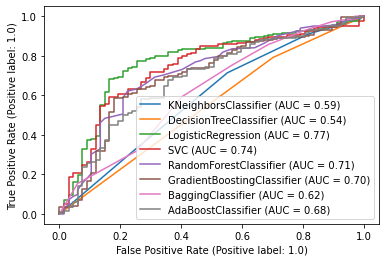

In [808]:
disp=plot_roc_curve(knn,x_test,y_test)
plot_roc_curve(DTC,x_test,y_test,ax=disp.ax_)
plot_roc_curve(lr,x_test,y_test,ax=disp.ax_)
plot_roc_curve(svc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rfc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(gbdt,x_test,y_test,ax=disp.ax_)
plot_roc_curve(bgg,x_test,y_test,ax=disp.ax_)
plot_roc_curve(ada,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':10},loc='lower right')
plt.show()

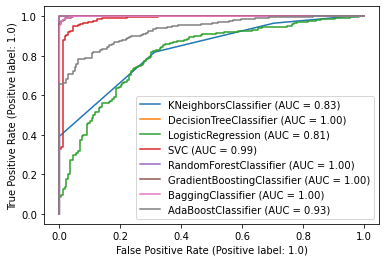

In [809]:
disp=plot_roc_curve(knn,x_train,y_train)
plot_roc_curve(DTC,x_train,y_train,ax=disp.ax_)
plot_roc_curve(lr,x_train,y_train,ax=disp.ax_)
plot_roc_curve(svc,x_train,y_train,ax=disp.ax_)
plot_roc_curve(rfc,x_train,y_train,ax=disp.ax_)
plot_roc_curve(gbdt,x_train,y_train,ax=disp.ax_)
plot_roc_curve(bgg,x_train,y_train,ax=disp.ax_)
plot_roc_curve(ada,x_train,y_train,ax=disp.ax_)
plt.legend(prop={'size':10},loc='lower right')
plt.show()

In [810]:
auc_score = roc_auc_score(y_test,y_test)
print(auc_score)

1.0



# TUNNING

In [813]:
from sklearn.model_selection import GridSearchCV

In [853]:
bgg = GridSearchCV(BaggingClassifier(), params, cv = 10, n_jobs =-1)
bgg.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=BaggingClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_samples': [1.0, -1],
                         'n_estimators': [100, 150], 'n_jobs': [-1, -2]})

In [854]:
bgg.best_params_

{'bootstrap': True, 'max_samples': 1.0, 'n_estimators': 100, 'n_jobs': -1}

In [861]:
bgg_clf=BaggingClassifier(bootstrap = True, max_samples = 1.0,n_estimators = 150, n_jobs = -1) 
bgg_clf.fit(x_train,y_train)
pred=bgg_clf.predict(x_train)

In [862]:
bgg_clf_report=pd.DataFrame(classification_report(y_train,pred,output_dict=True))

print('\n==================Train Result=============')
print(f'Accuracy Score:{accuracy_score(y_train,pred)*100:.2f}%')
print('-----------------------------------------')
print(f"Classification Report:\n{bgg_clf_report}")
print('----------------------------------')
print(f"confusion matrix:\n{confusion_matrix(y_train,pred)}\n")
#******************* Test SCore**********************
pred=bgg_clf.predict(x_test)
clf_report=pd.DataFrame(classification_report(y_test,pred,output_dict=True))
print('***********test results***********')
print(f'Accuracy Score:{accuracy_score(y_test,pred)*100:.2f}%')
print('-----------------------------------------')
print(f"Classification Report:\n{clf_report}")
print('----------------------------------')
print(f"confusion matrix:\n{confusion_matrix(y_test,pred)}\n")
print('Cross validation --> ',bgg_clf_report)


==================Train Result=============
Accuracy Score:100.00%
-----------------------------------------
Classification Report:
             0.0    1.0  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    179.0  568.0       1.0      747.0         747.0
----------------------------------
confusion matrix:
[[179   0]
 [  0 568]]

***********test results***********
Accuracy Score:73.09%
-----------------------------------------
Classification Report:
                 0.0         1.0  accuracy   macro avg  weighted avg
precision   0.500000    0.755556  0.730924    0.627778      0.686792
recall      0.179104    0.934066  0.730924    0.556585      0.730924
f1-score    0.263736    0.835381  0.730924    0.549559      0.681565
support    67.000000  182.000000  0.730924  249.000000    249.000000
----------------------------

tunning is decreasing the accuracy so we will go with the normal 

In [863]:
print('bgg_csv --> ',bgg_csv)

bgg_csv -->  0.8383618090452261


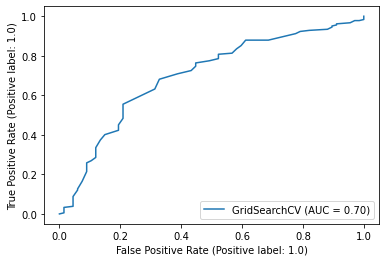

In [864]:
disp=plot_roc_curve(bgg,x_test,y_test)
plt.legend(prop={'size':10},loc='lower right')
plt.show()

In [865]:
auc_score = roc_auc_score(y_test,y_test)
print(auc_score)

1.0


In [866]:
import pickle

In [867]:
pickle.dump(bgg_csv,open('Insurance Claims- Fraud Detection','wb'))